Data overview: 
(220320, 55)

keys :
Index(['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22',
       'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27',
       'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32',
       'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37',
       'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42',
       'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47',
       'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

status options:
['NORMAL' 'BROKEN' 'RECOVERING']

machine_status
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: count, 

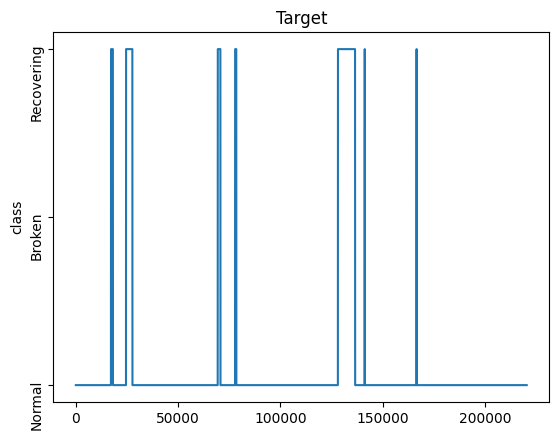

<ipython-input-5-f21b31fe5a47>:40: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['sensor_51'][110000:140000]=data['sensor_50'][110000:140000] # repair sensor 51
<ipython-input-5-f21b31fe5a47>:40: SettingWithCopyWarning: 
A value is tryi

Unnamed: 0        0
timestamp         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0
sensor_51         0
machine_status    0
dtype: int64


<ipython-input-5-f21b31fe5a47>:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure()


{'BROKEN': 0, 'NORMAL': 1, 'RECOVERING': 2}


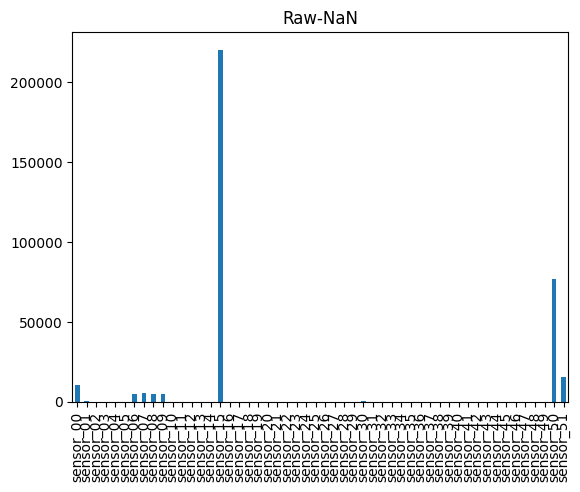

<Figure size 640x480 with 0 Axes>

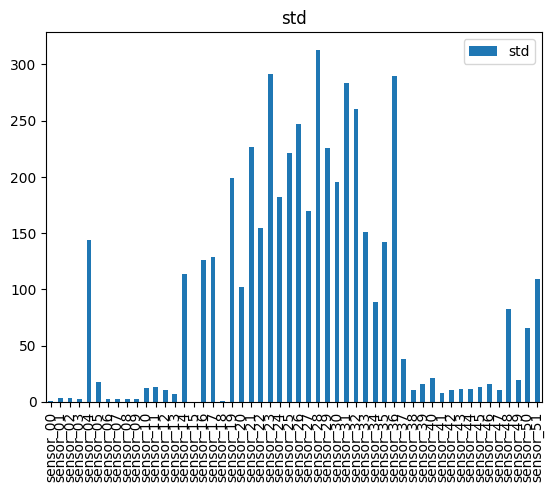

<Figure size 640x480 with 0 Axes>

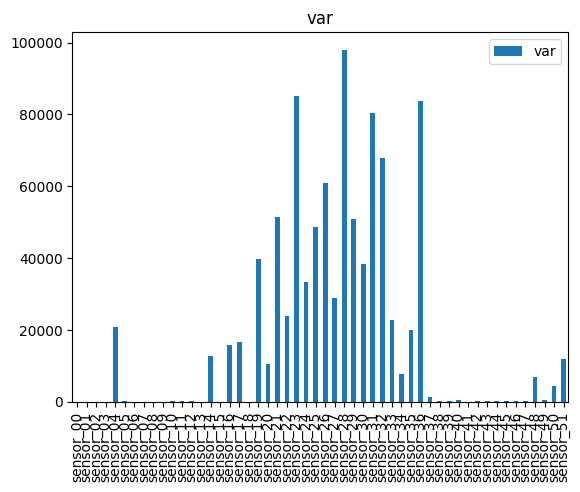

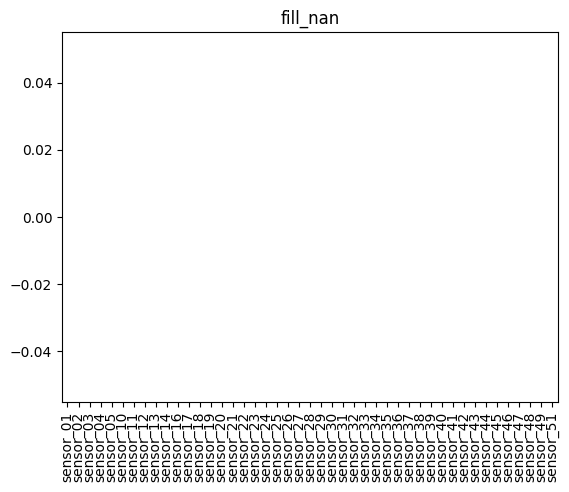

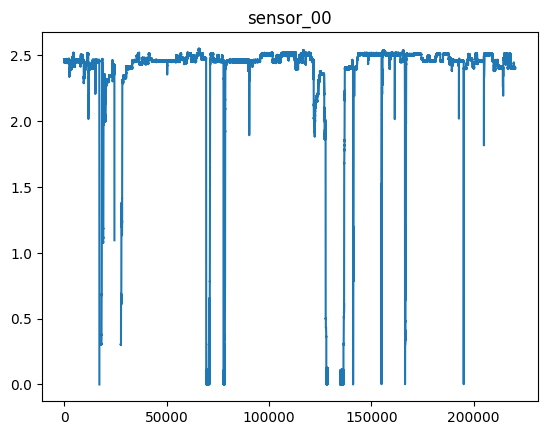

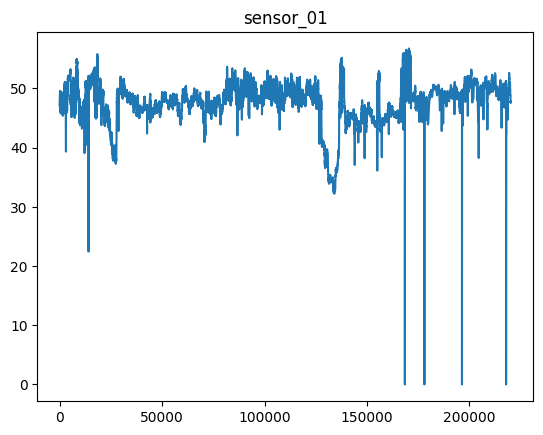

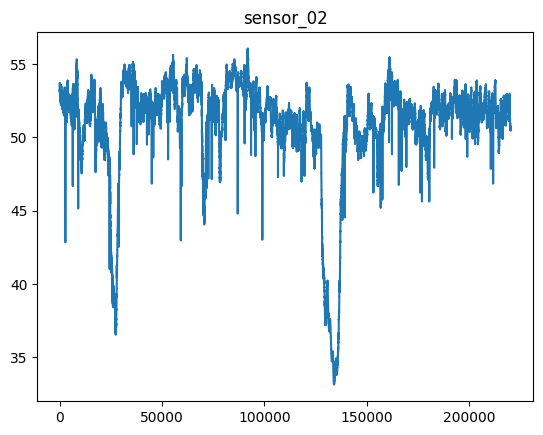

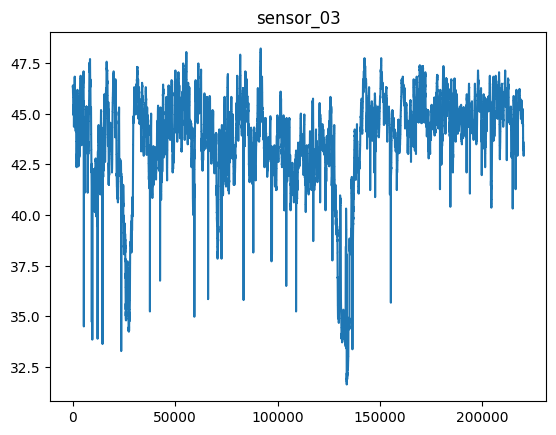

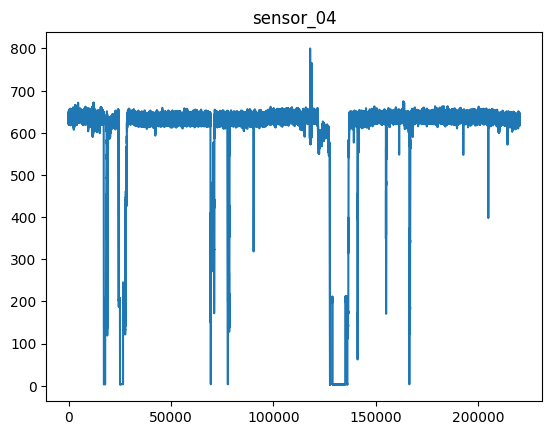

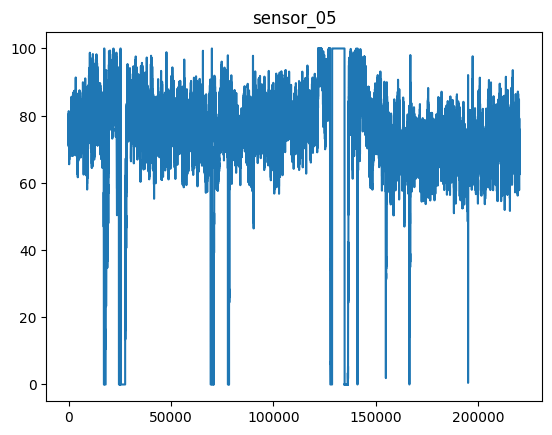

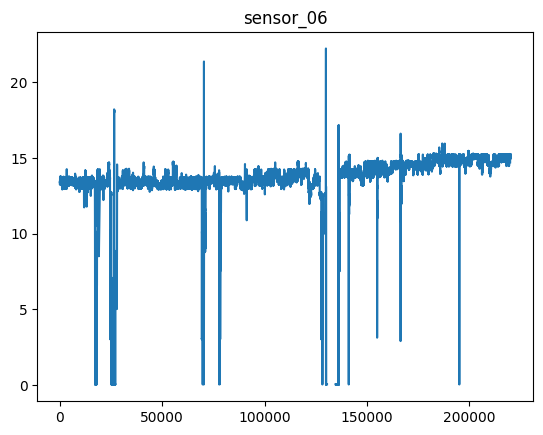

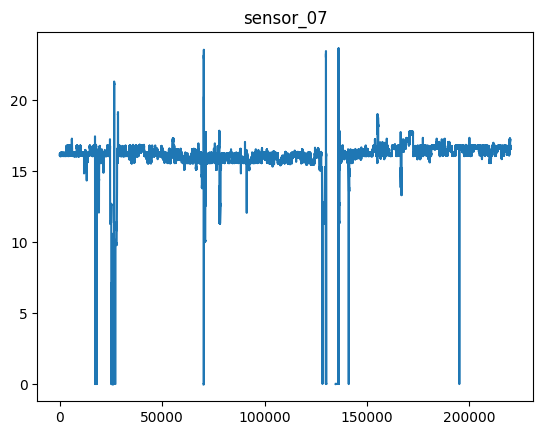

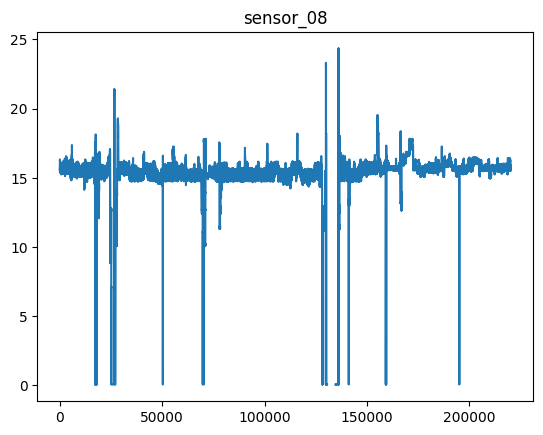

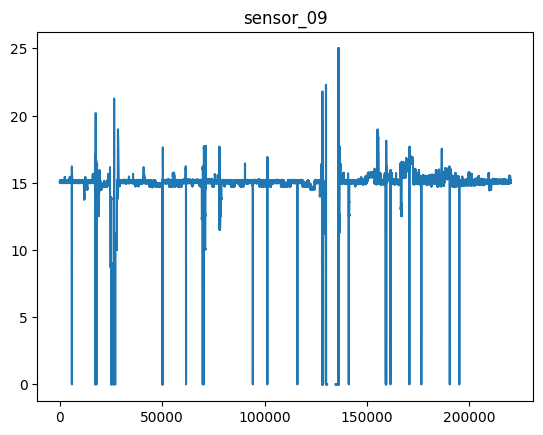

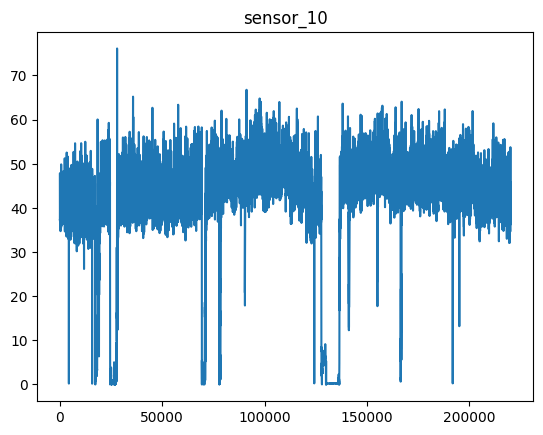

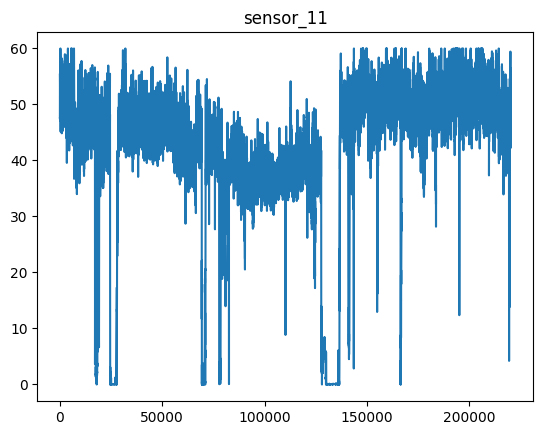

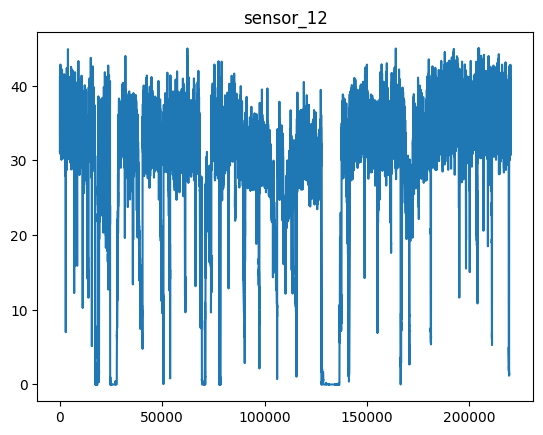

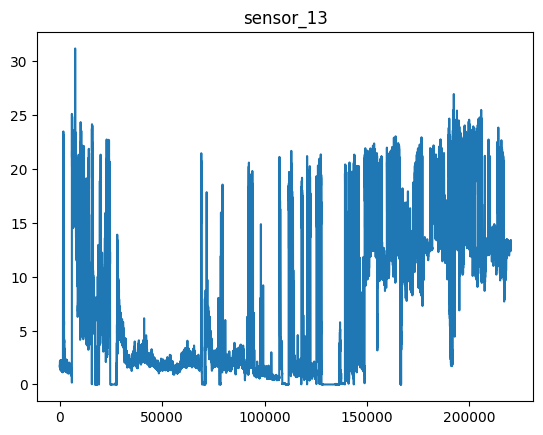

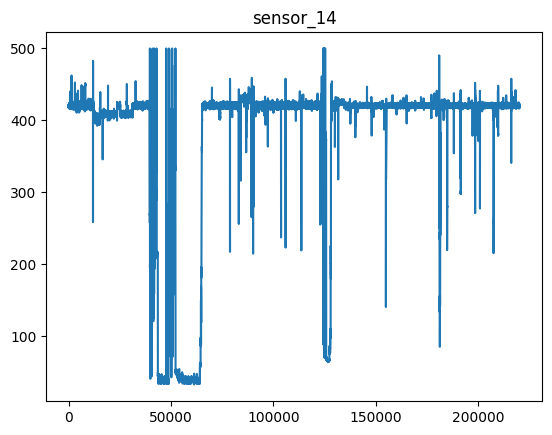

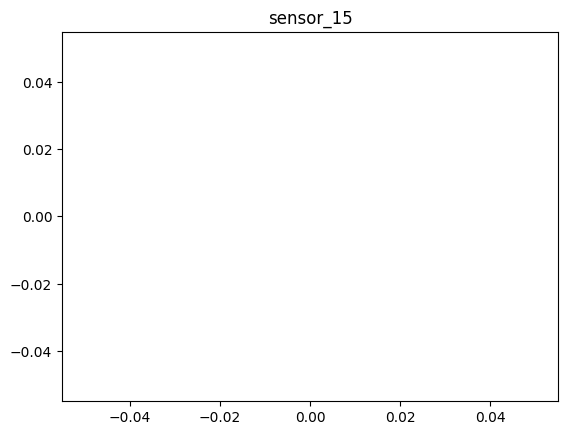

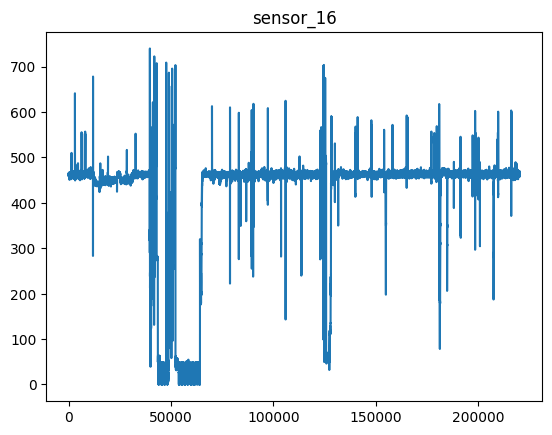

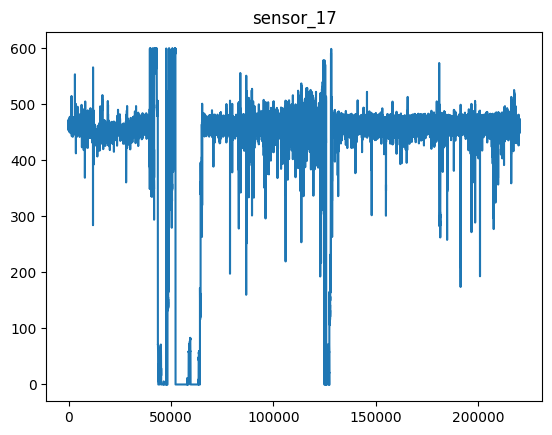

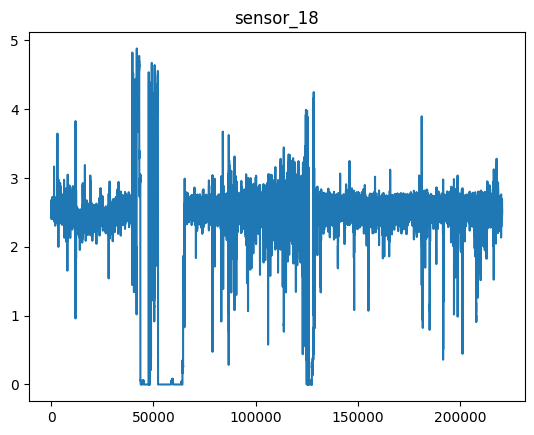

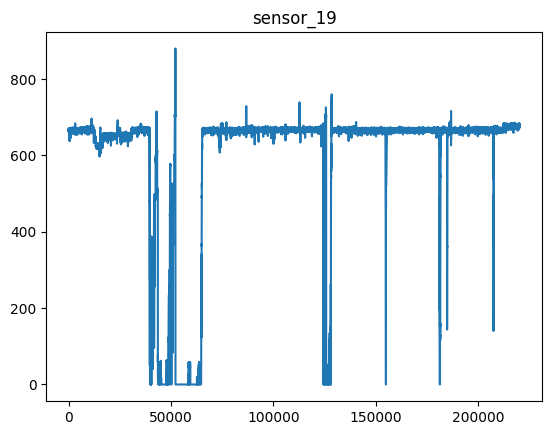

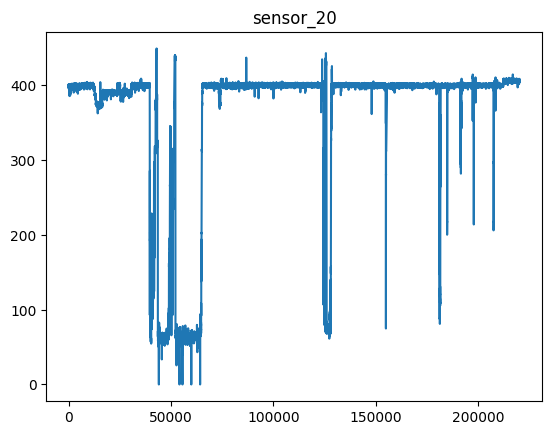

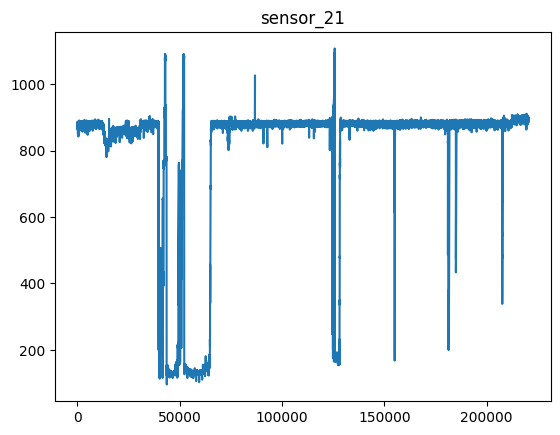

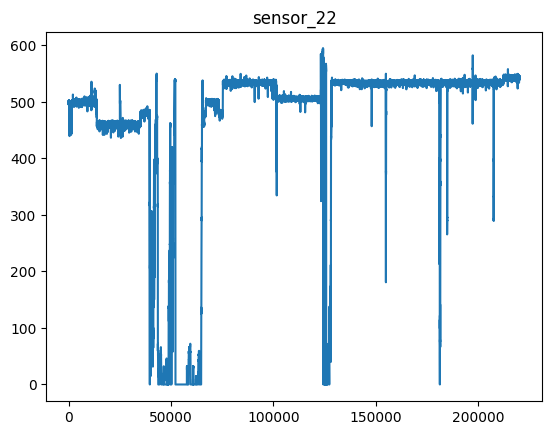

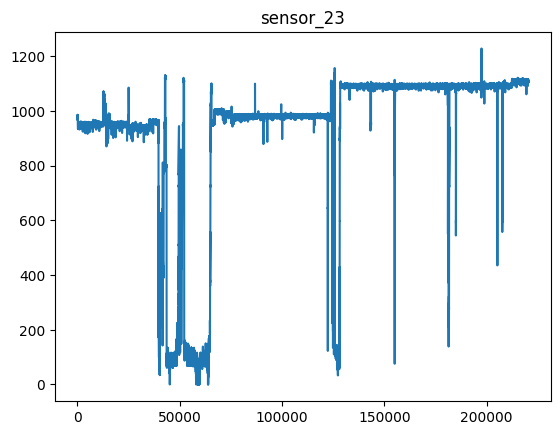

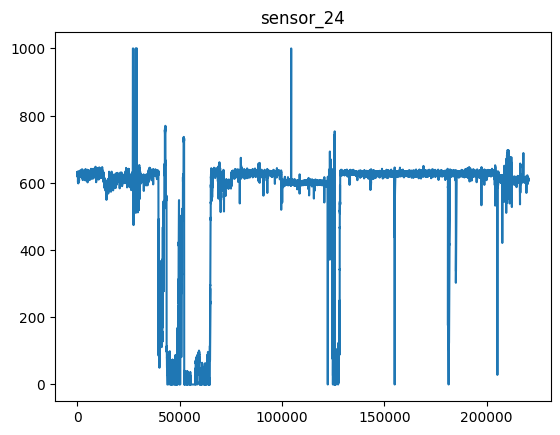

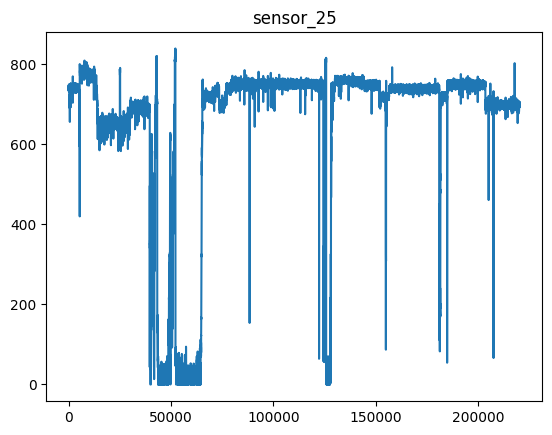

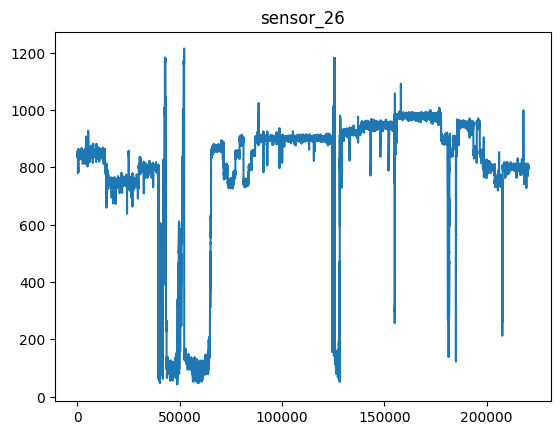

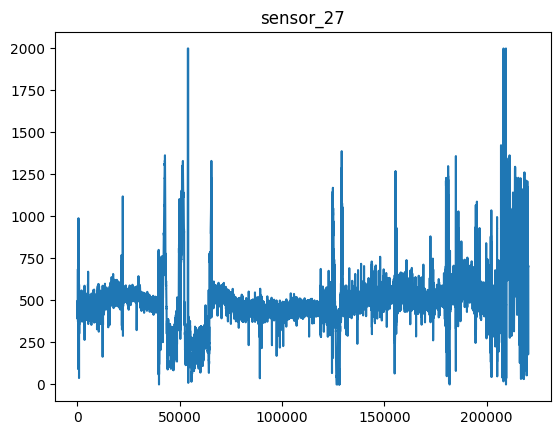

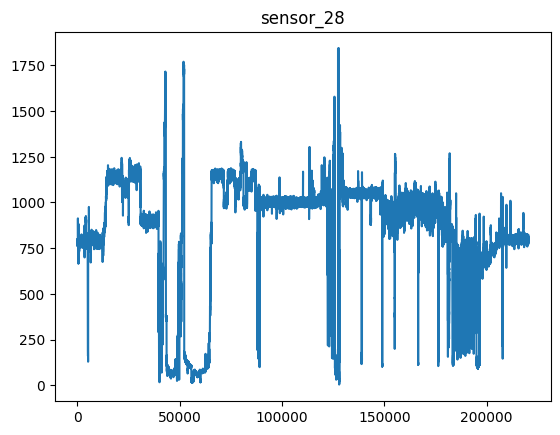

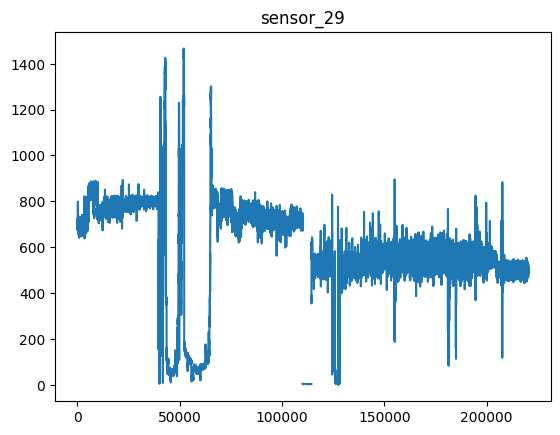

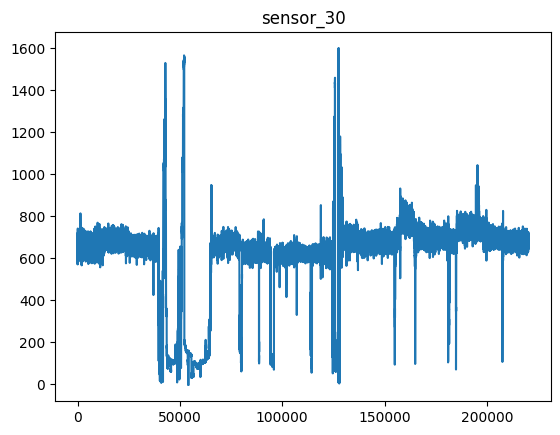

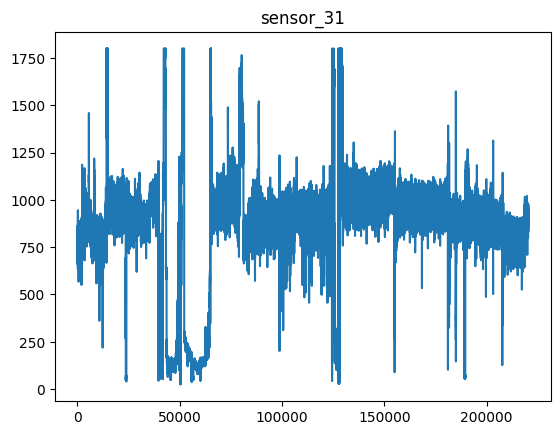

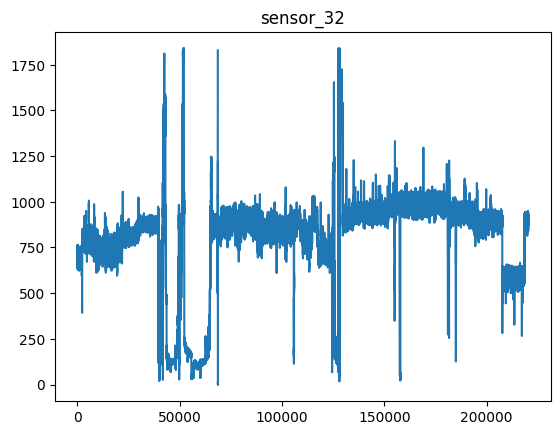

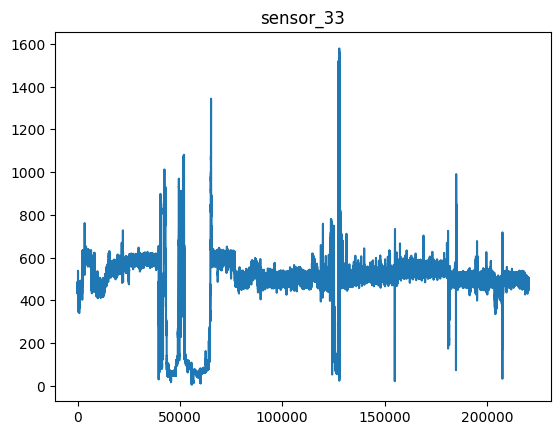

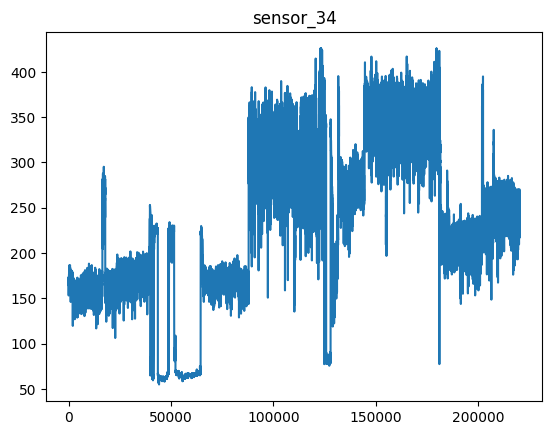

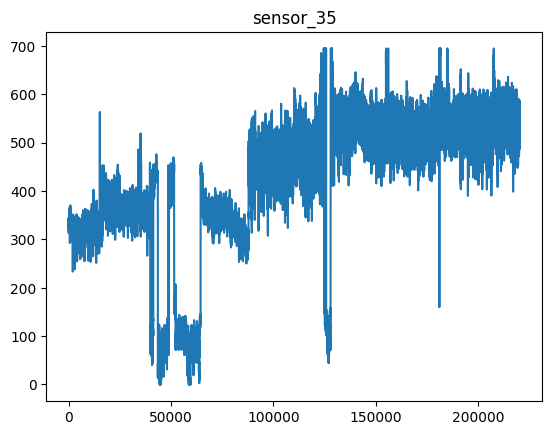

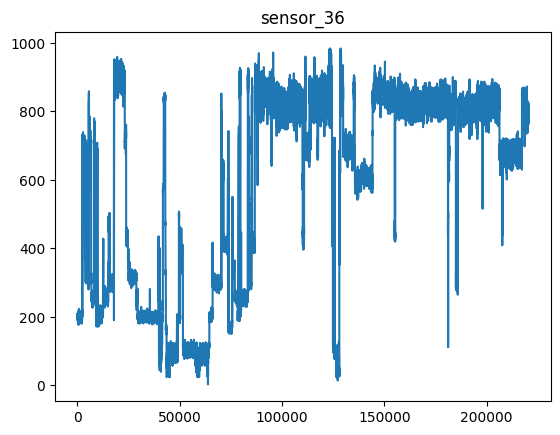

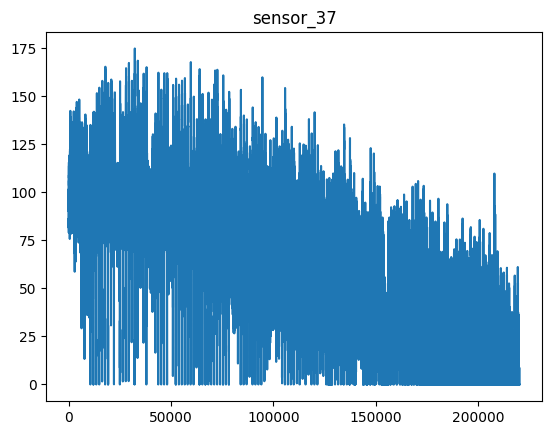

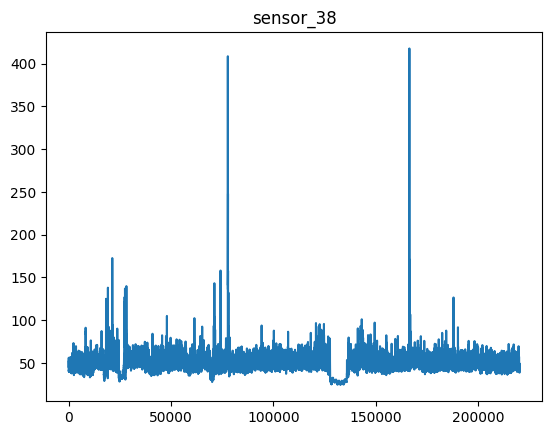

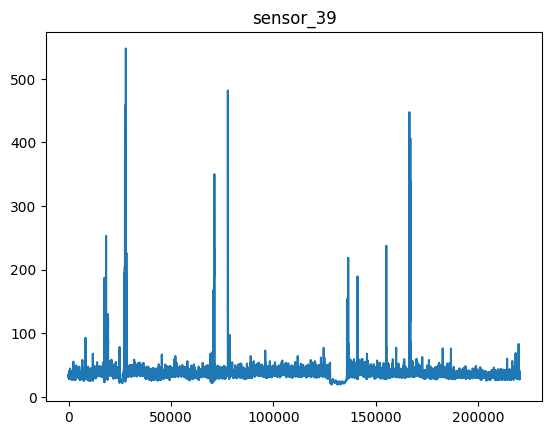

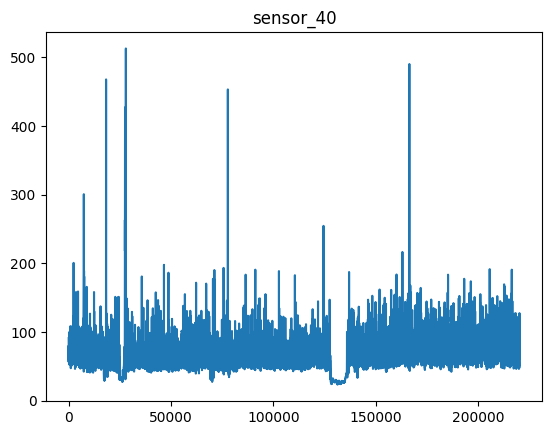

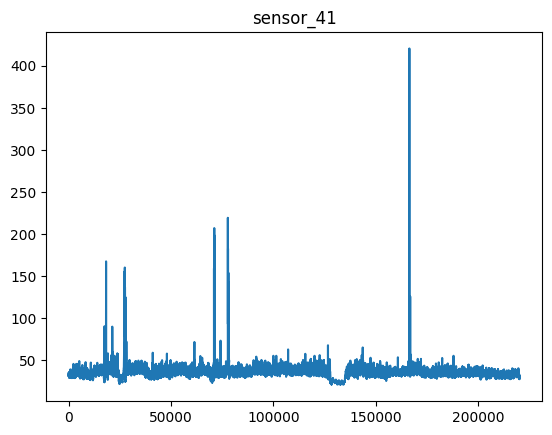

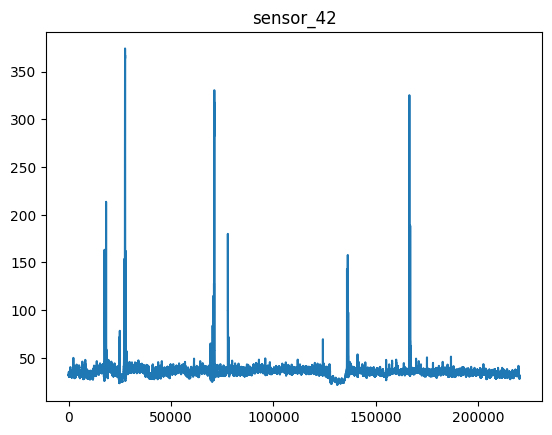

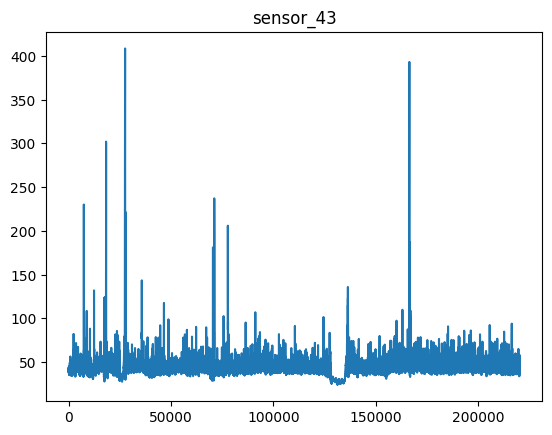

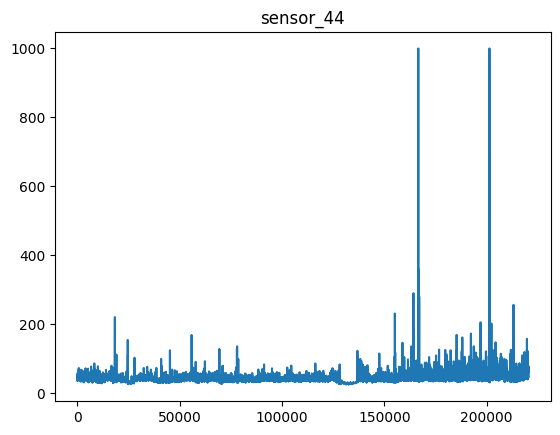

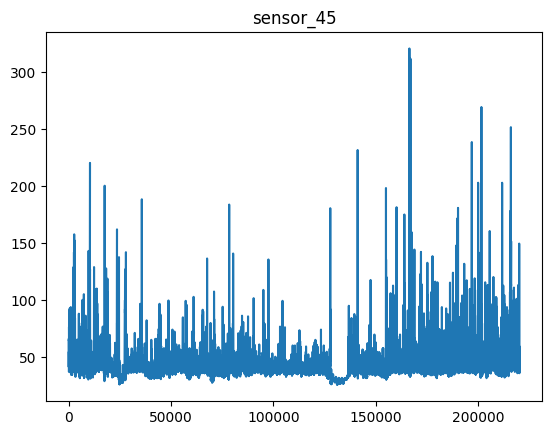

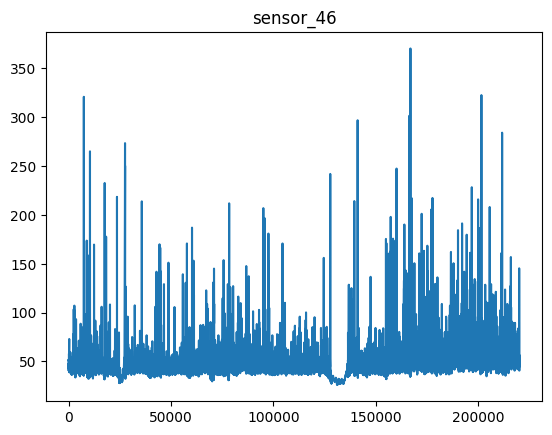

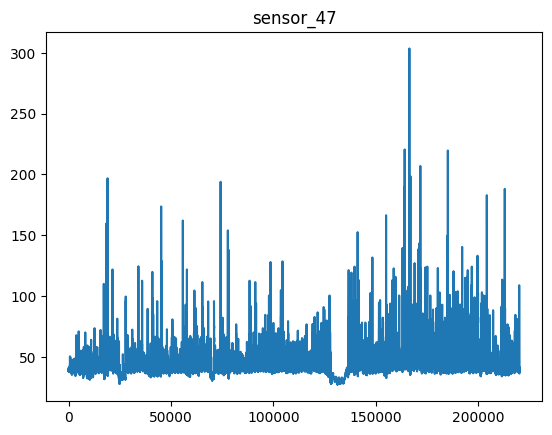

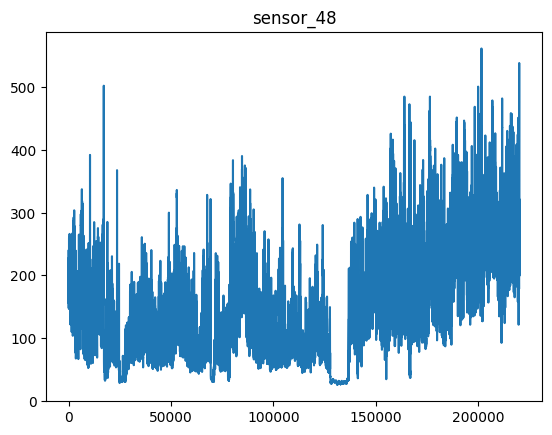

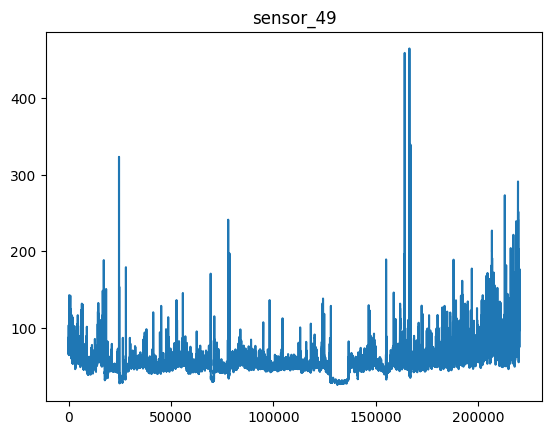

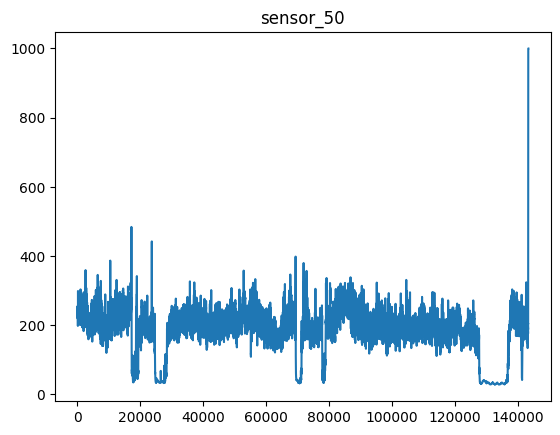

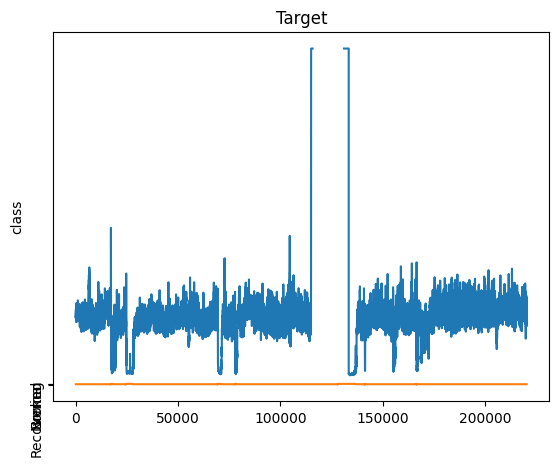

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


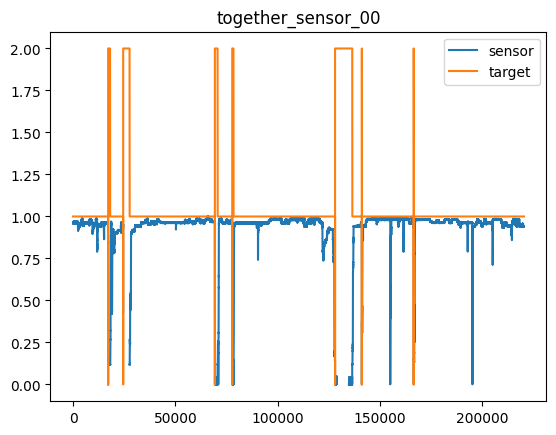

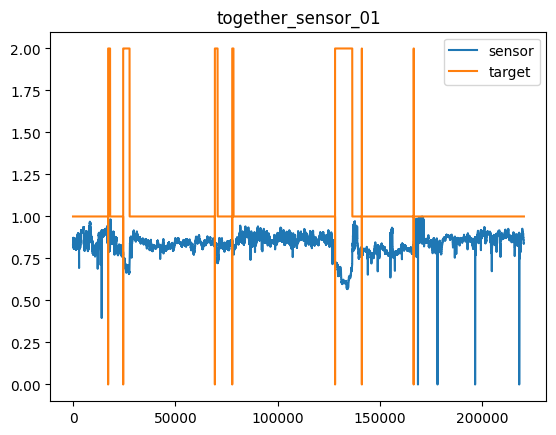

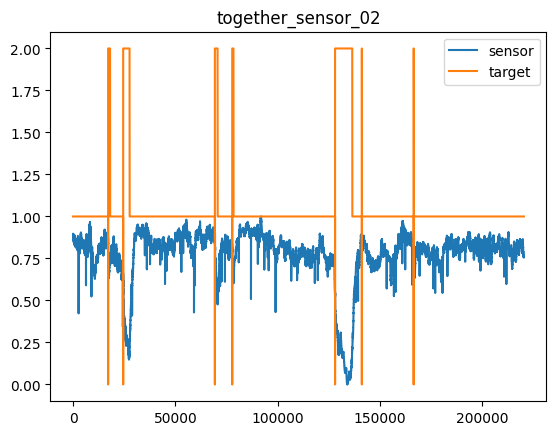

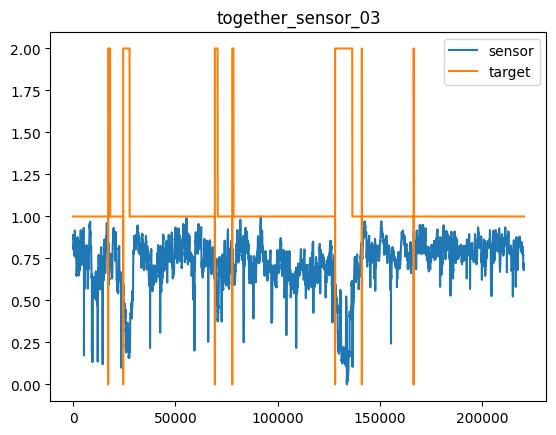

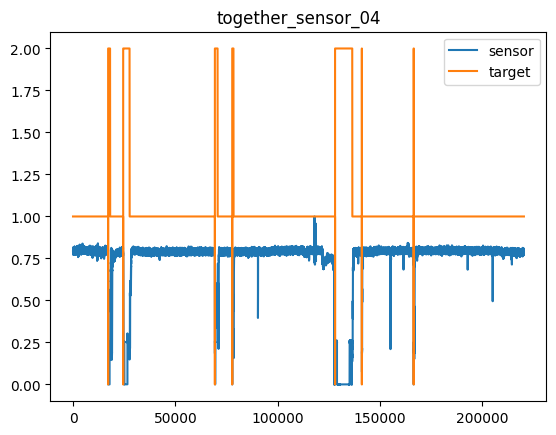

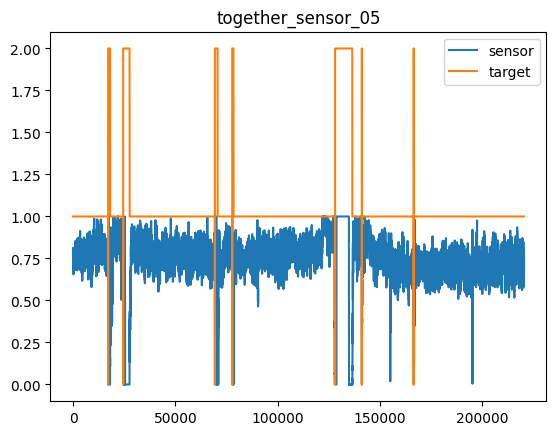

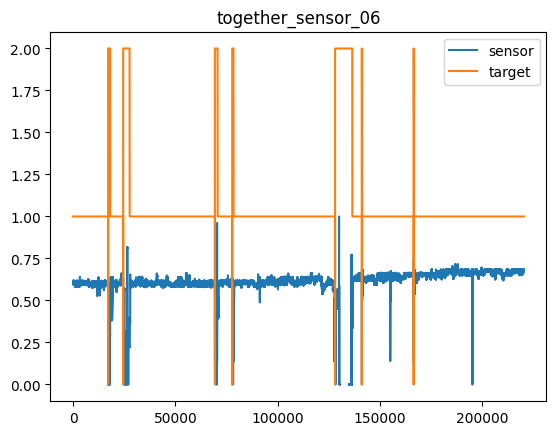

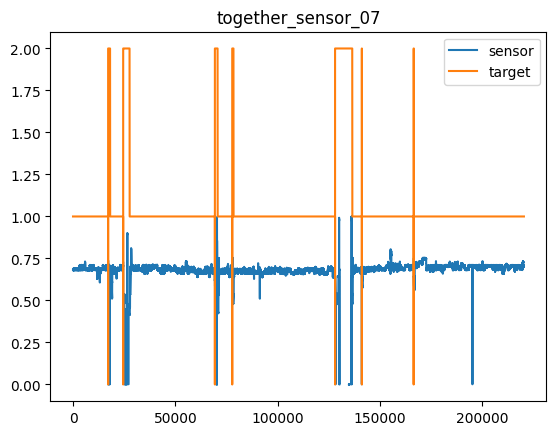

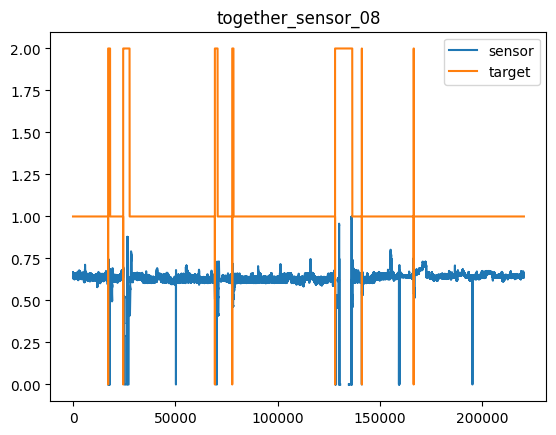

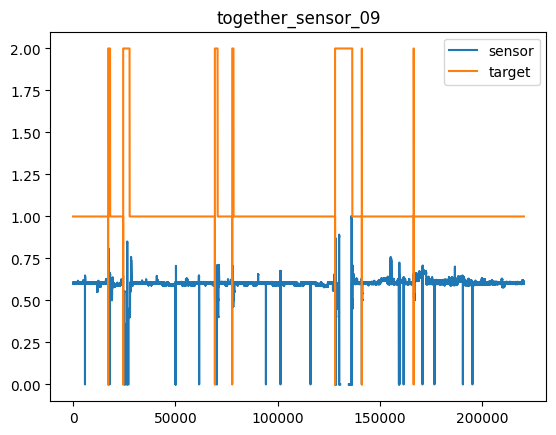

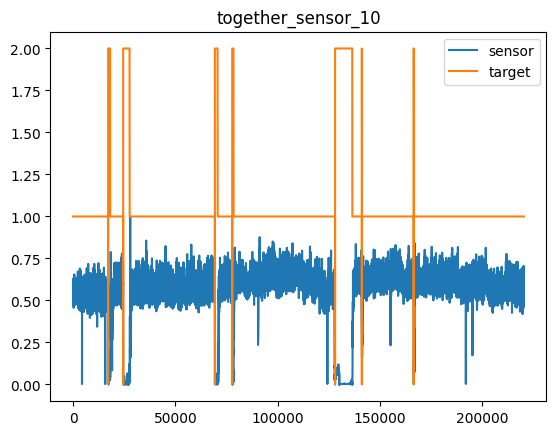

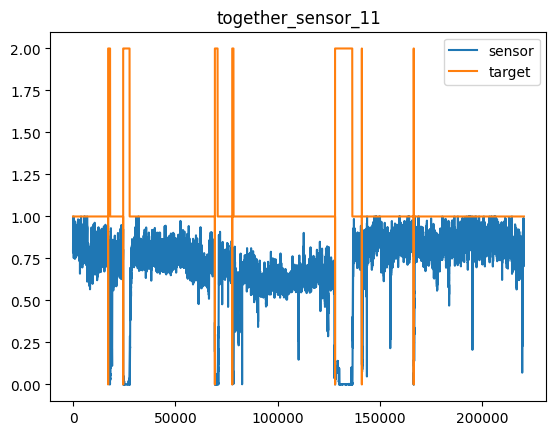

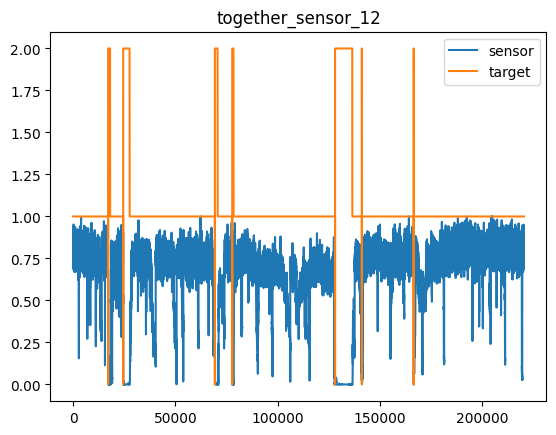

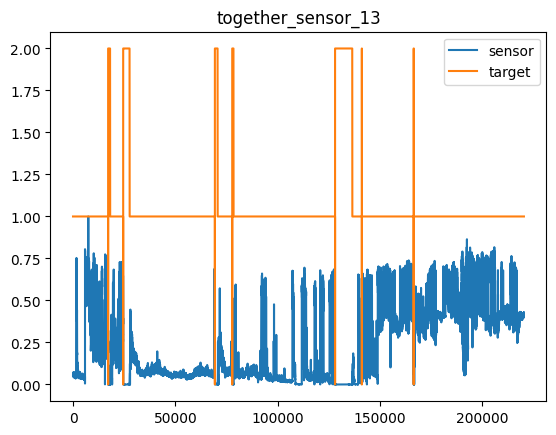

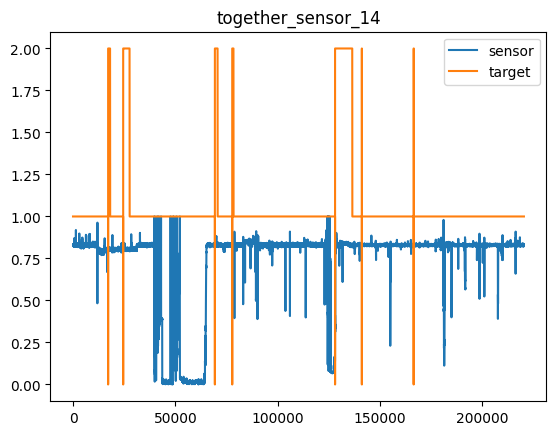

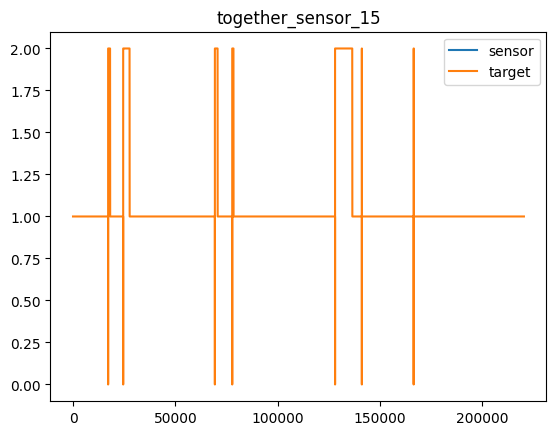

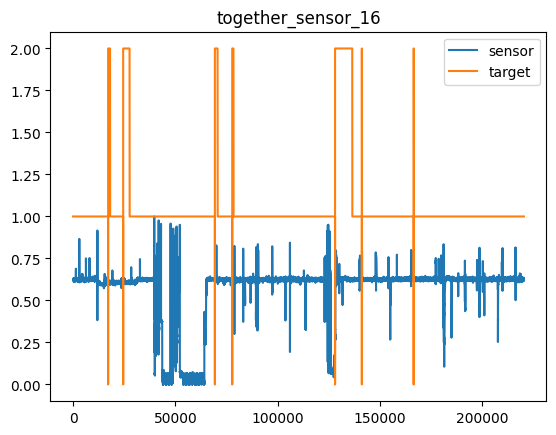

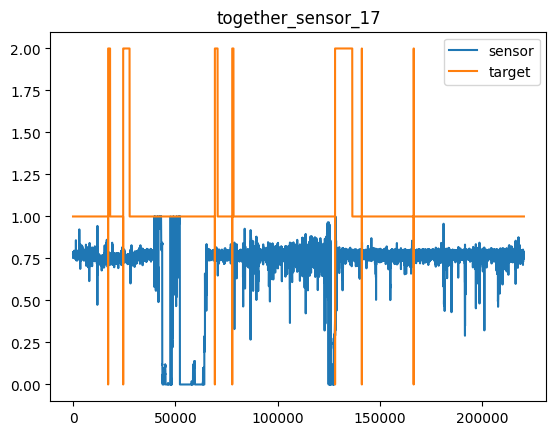

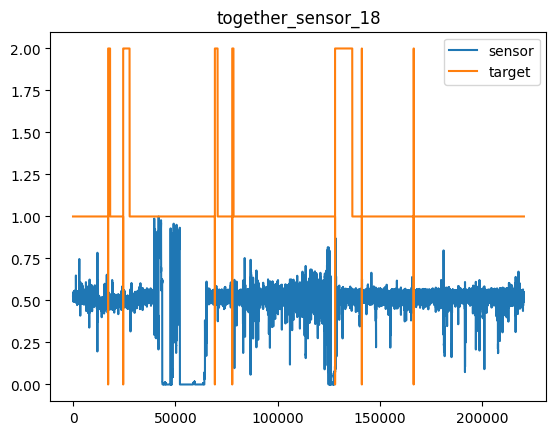

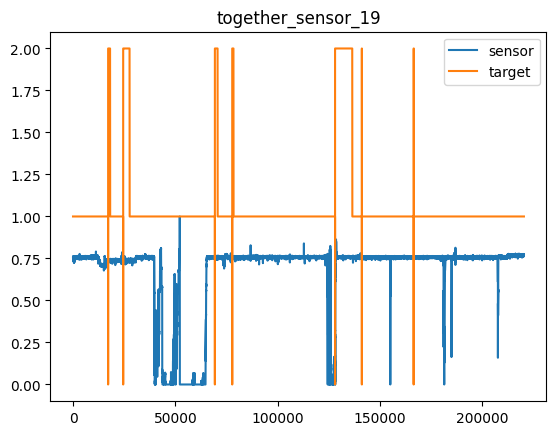

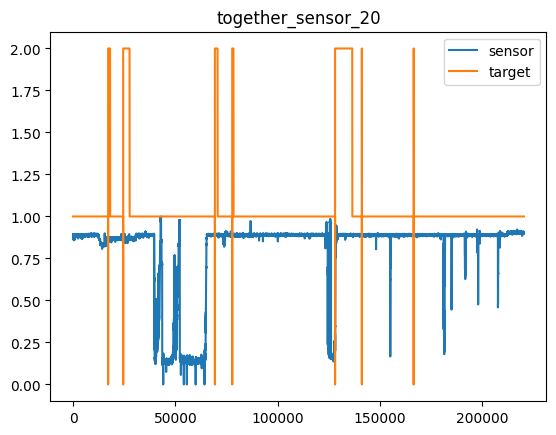

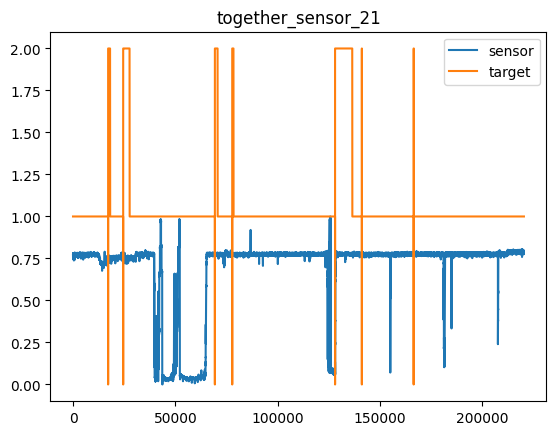

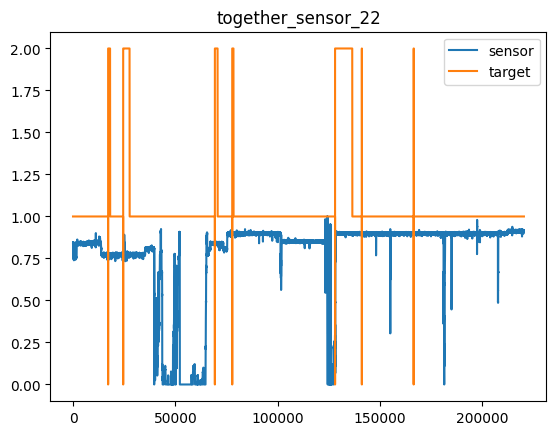

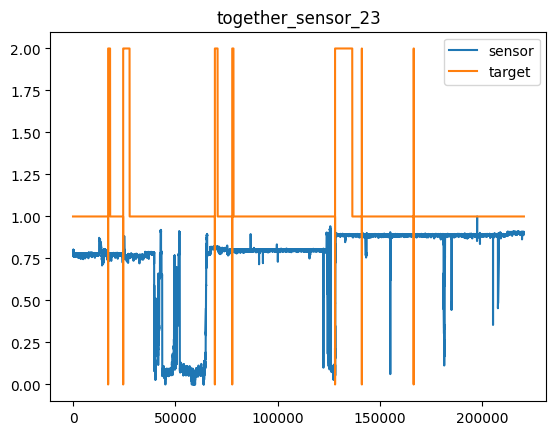

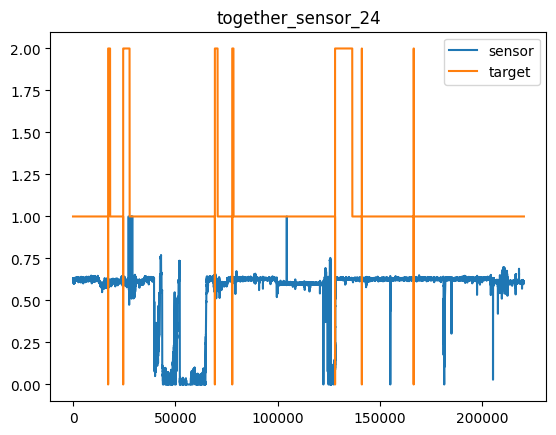

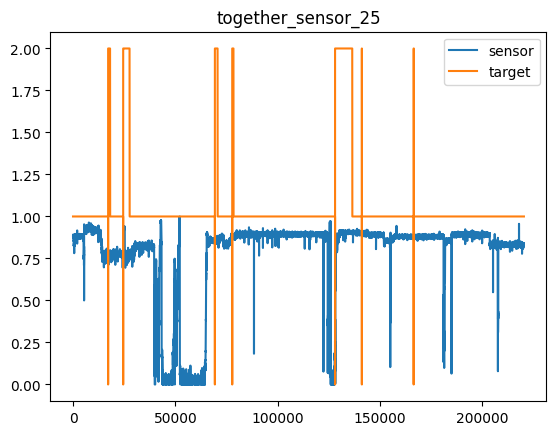

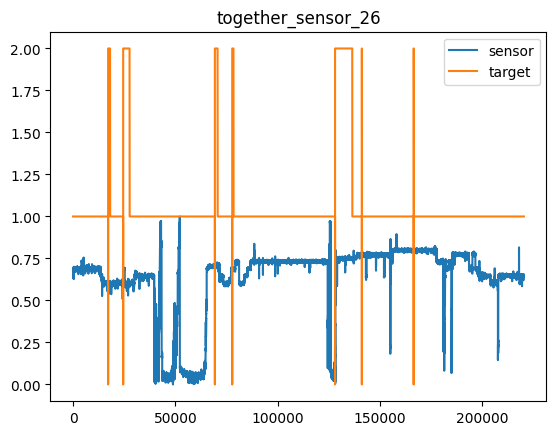

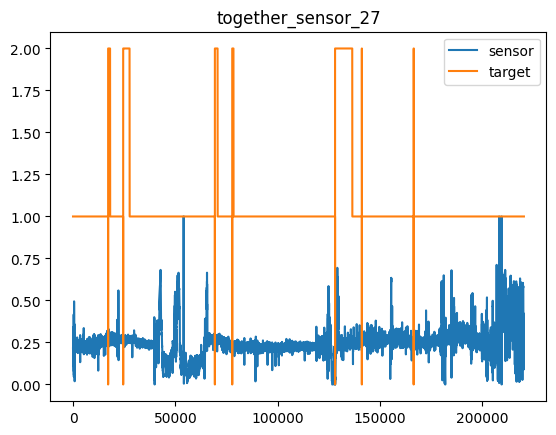

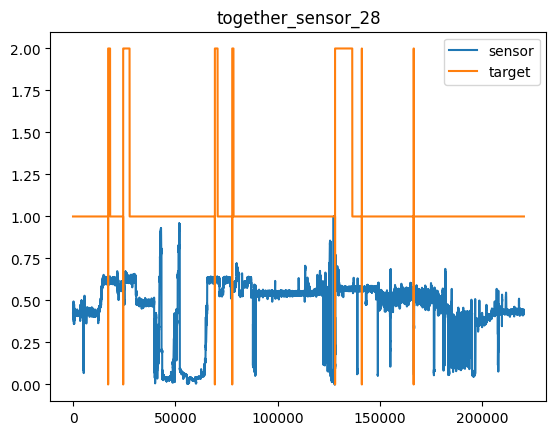

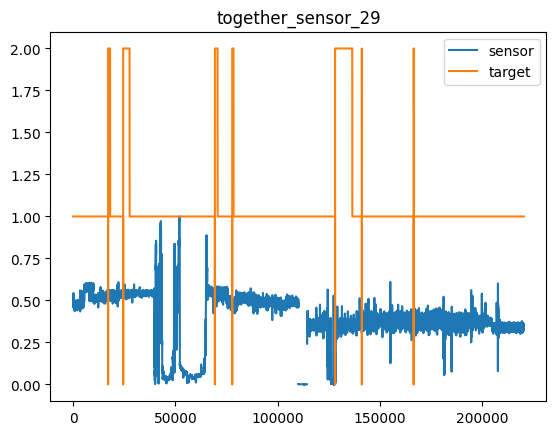

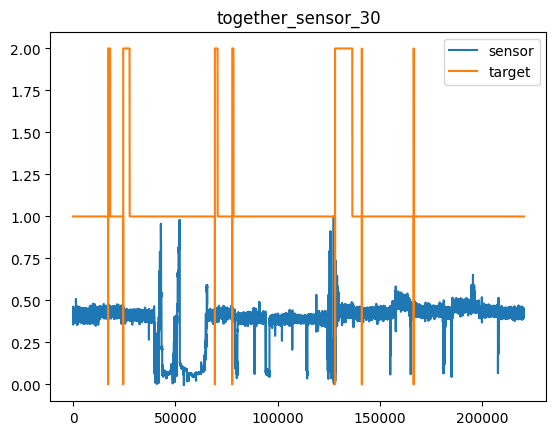

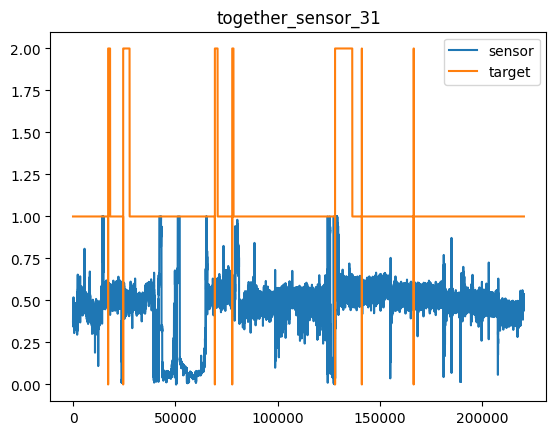

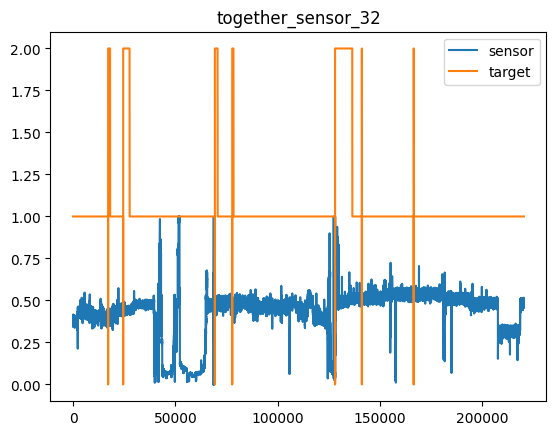

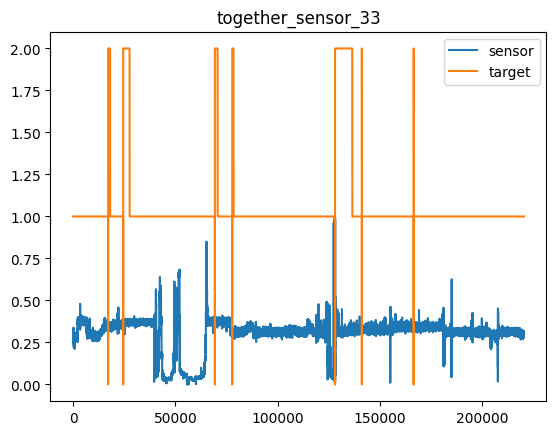

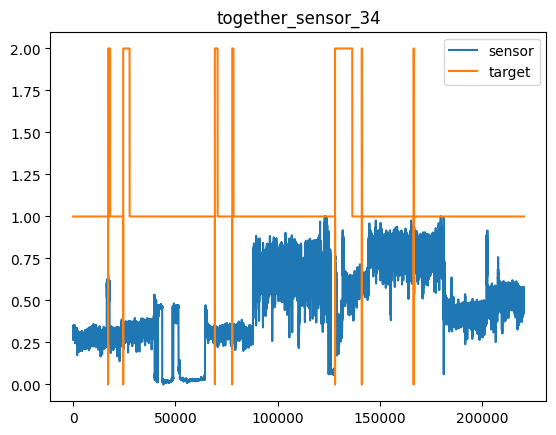

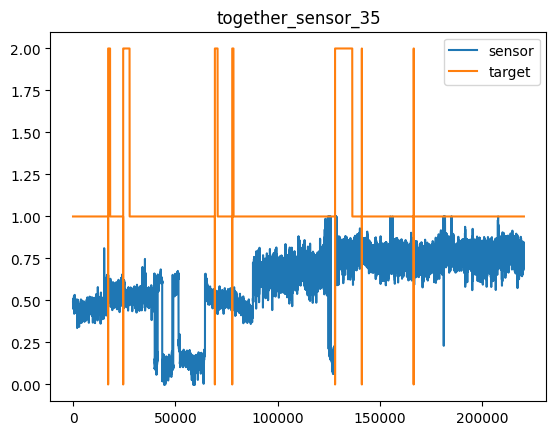

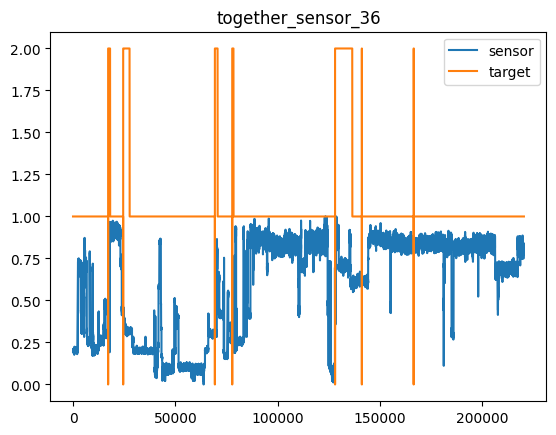

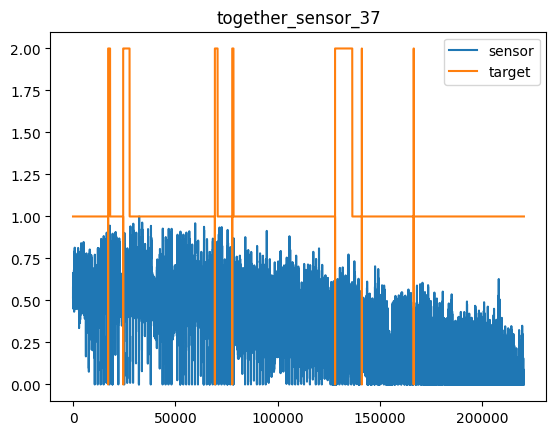

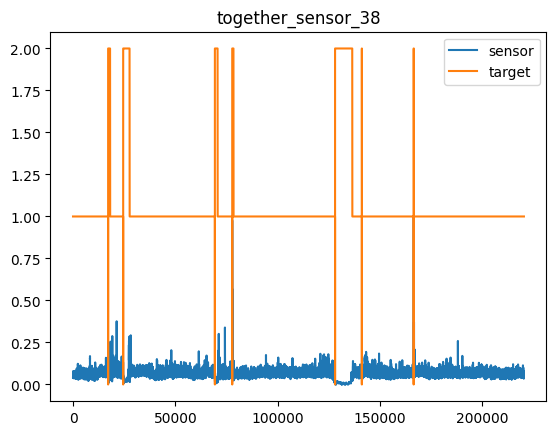

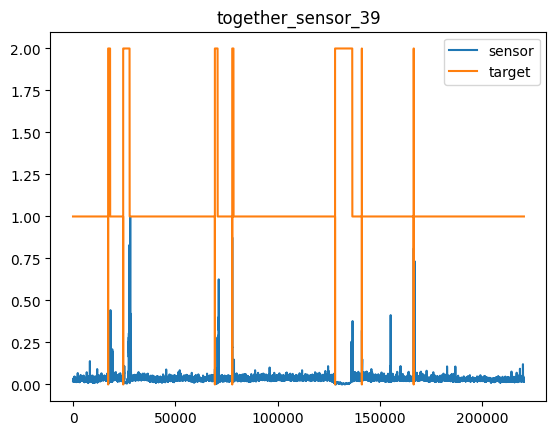

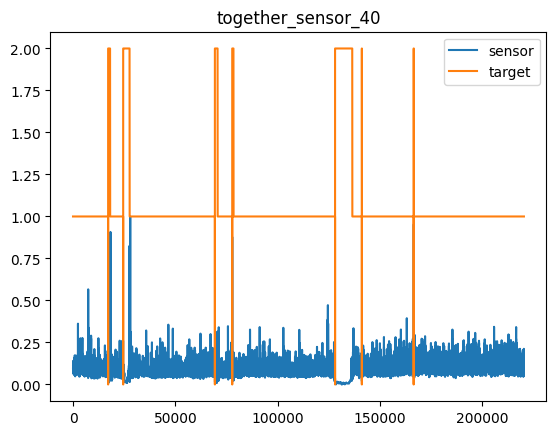

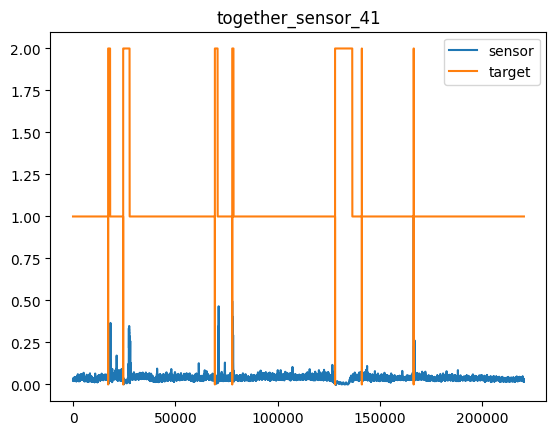

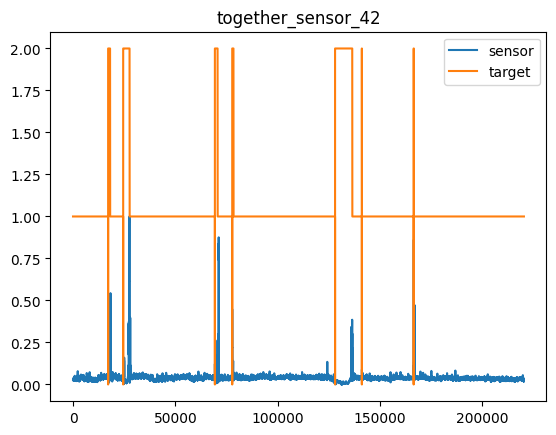

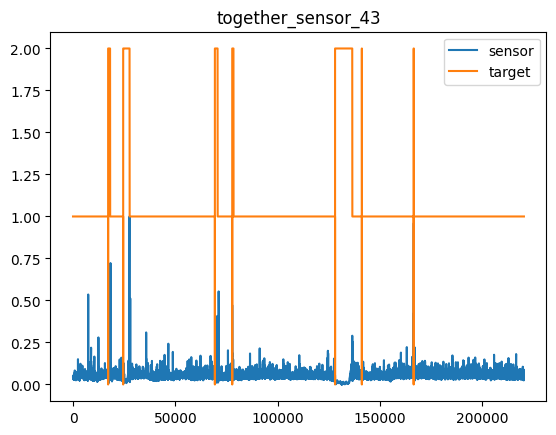

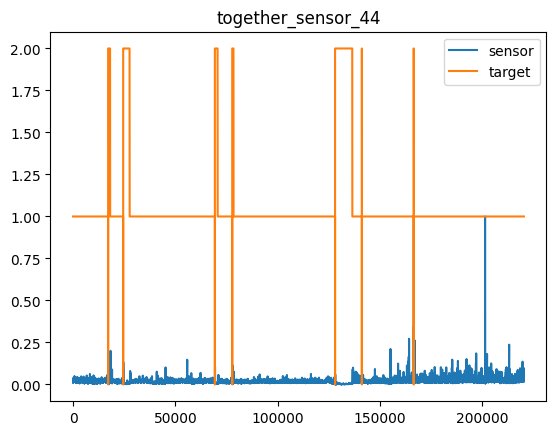

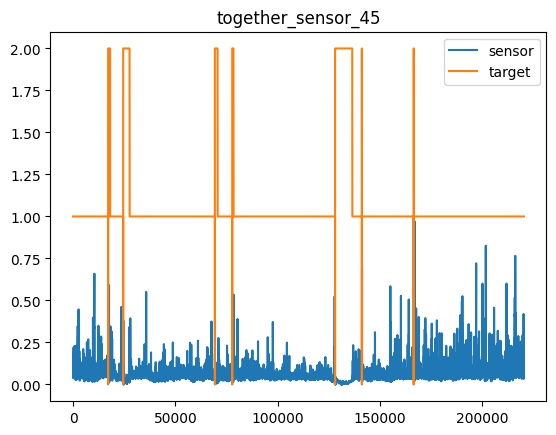

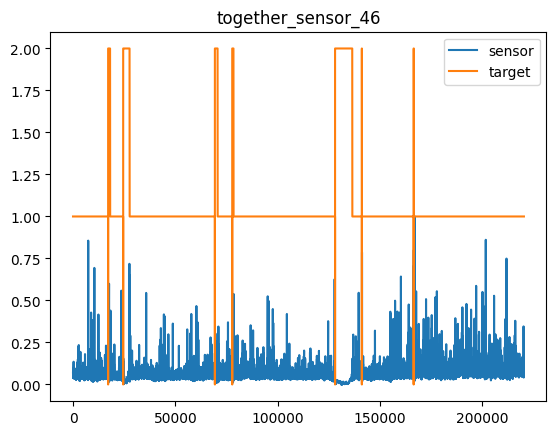

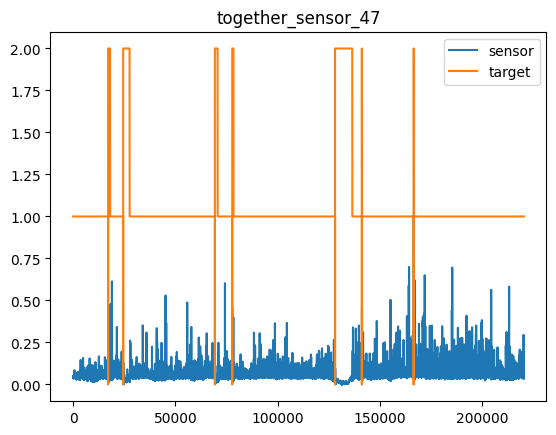

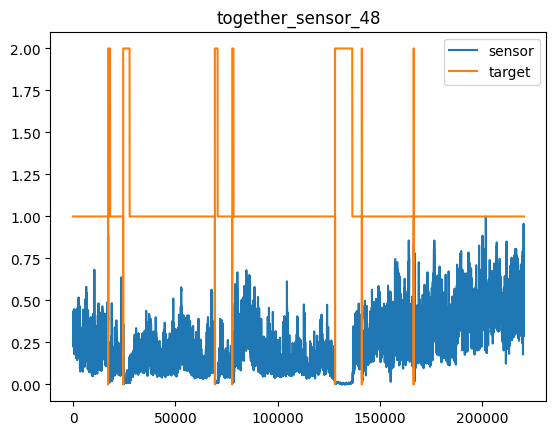

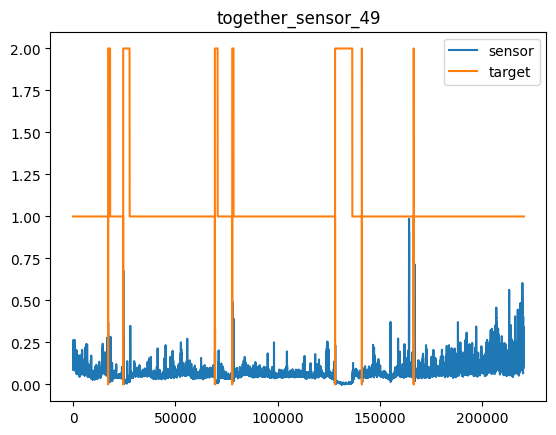

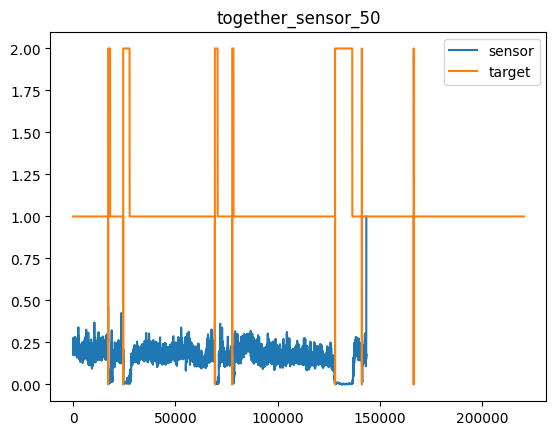

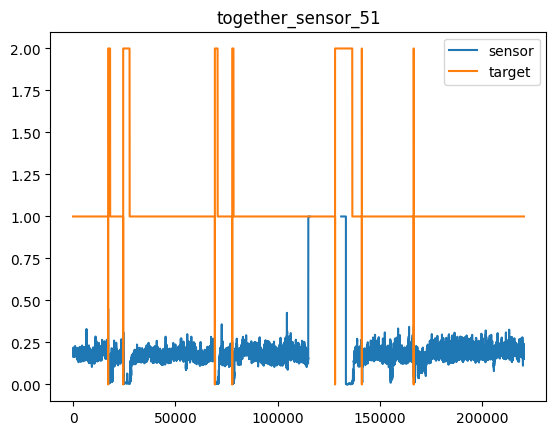

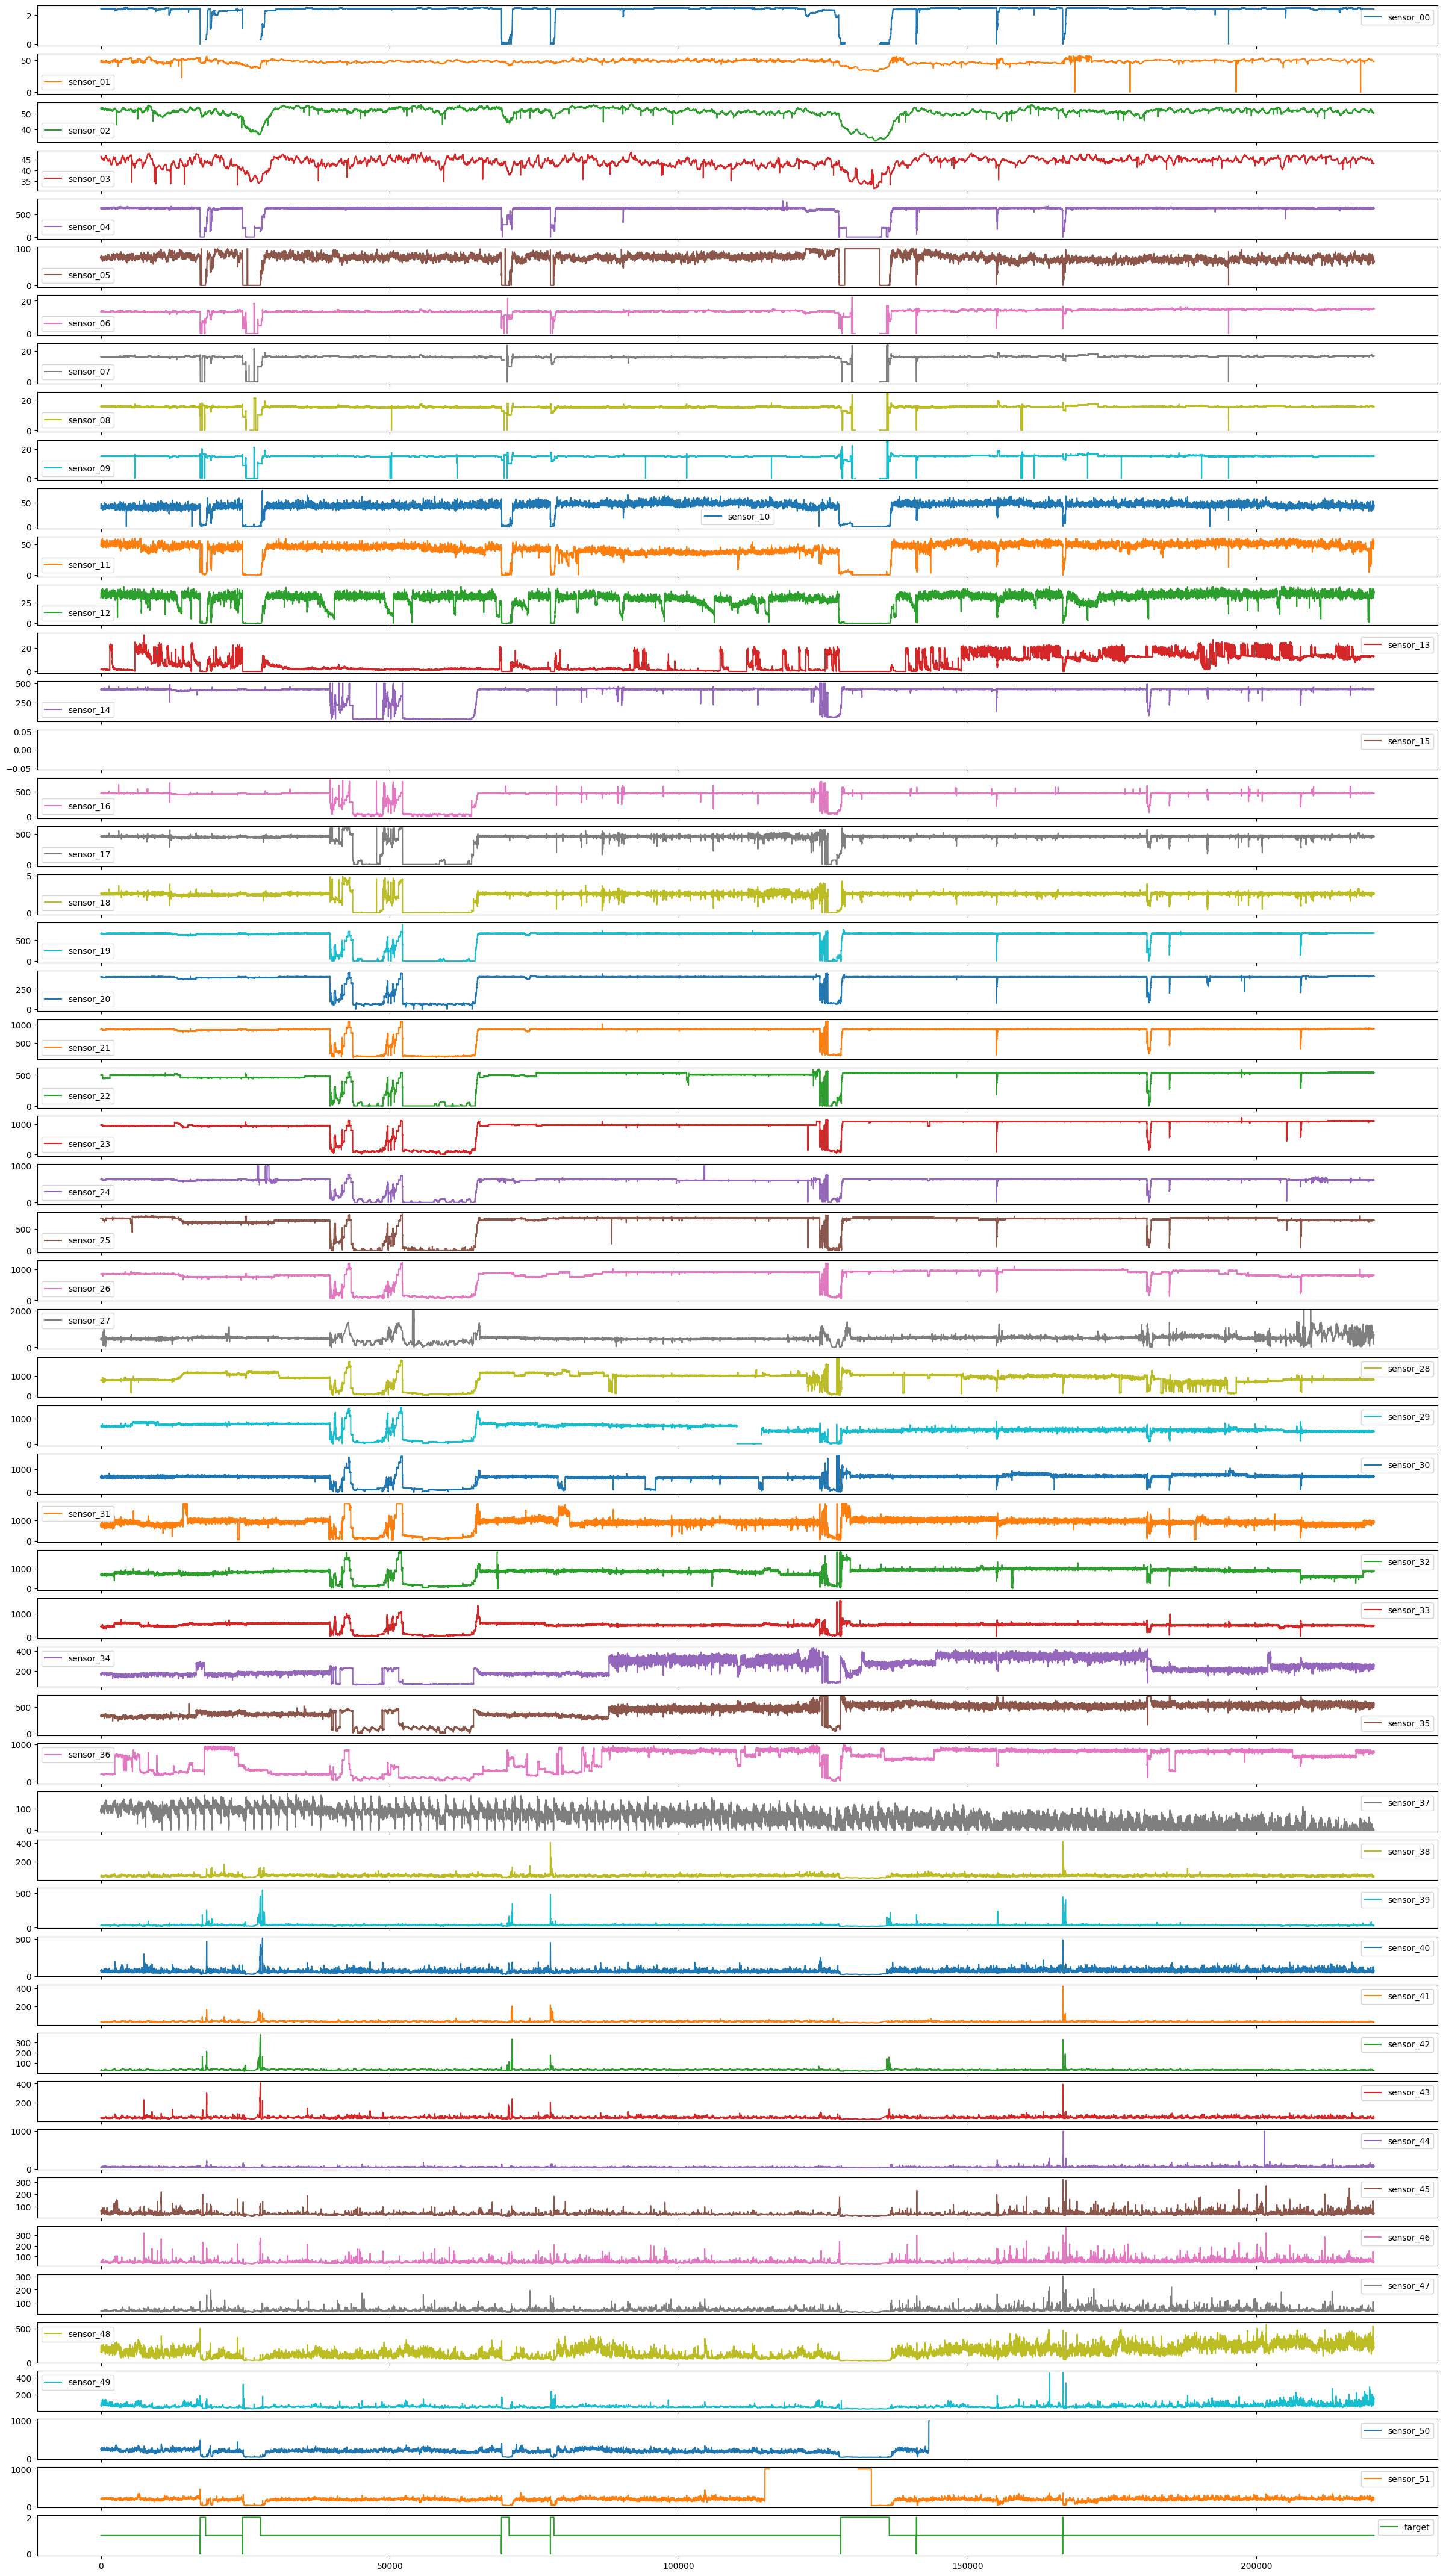

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing


def read_data(path):
    dat=pd.read_csv(path)
    dat.iloc[:, 1] = pd.to_datetime(dat.iloc[:, 1])
    #senorname=pd.Series(dat.keys()[2:-1])
    senorname=dat.keys()[2:-1] #geht beides

    return dat, senorname

# def counting_target(data):
#     laenge=data['machine_status'].Count.groupby(
#         (data['machine_status'] != data['machine_status'].Count.shift()).cumsum()).transform('size')*data['machine_status'].Count

#     return laenge

def explore(data):
    print('Data overview: ')
    print(data.shape); print()
    print('keys :'); print(data.keys()); print()
    print('status options:'); print(data['machine_status'].unique()); print()
    print(data['machine_status'].value_counts()); print()

    # Select only numeric columns for statistical analysis
    numeric_data = data.select_dtypes(include=[float, int])

    info = numeric_data.describe()
    varianz = pd.DataFrame({'var': numeric_data.var()})
    info = pd.concat([info, varianz.transpose()])
    return data.head(), data.tail(), info

def manipulate_X(data, printplot=False):
    data=data.drop(labels=['sensor_15'],axis=1)#bad sensors
    data=data.drop(labels=['sensor_00'],axis=1)#bad sensors

    data['sensor_51'][110000:140000]=data['sensor_50'][110000:140000] # repair sensor 51
    data=data.drop(labels=['sensor_50'],axis=1)#bad sensors

# data=data.drop(labels=['sensor_00','sensor_15','sensor_37','sensor_50'],axis=1)#bad sensors
    data=data.drop(labels=['sensor_06','sensor_07','sensor_08','sensor_09'],axis=1)# low varianz#NaNs
    data=data.fillna(method="pad",limit=30)
    data=data.dropna()
    if printplot==True:
        print((data.isna().sum()))
        plotting_stuff((data.isna().sum()[2:-1]),'bar','fill_nan',saving=True)

    return data

def plotting_stuff(data,plottype,Title, saving=False):
    #plt.plot(dat.loc[:,['sensor_01']])
    fig=plt.figure()
    data.plot(kind=plottype)
    #plt.stem(data)
    plt.title(Title)
    #plt.xticks(rotation=45)
    if saving==True:
        plt.savefig(Title+'.png', format='png', dpi=300, transparent=True)
    #fig.show()

def plotting_merged(data, encoded_y, senorname, saving=False):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaled_dat = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    for i in senorname:
        fig=plt.figure()
        ax=scaled_dat[i].plot.line()
        encoded_y.plot(ax=ax)
        plt.title('together_' + str(i) )
        plt.legend(['sensor','target'])
        if saving==True:
            fig.savefig('Sensor_'+str(i)+'.png', format='png', dpi=300, transparent=True)
        plt.show()

def plotting_together(Values):
    fig=plt.Figure()
    Values.plot(subplots = True, sharex = True, figsize=(30,55))
    plt.savefig('Overview.png', format='png', dpi=300, transparent=True)
    plt.show
def plot_Y(data, col='target', saving=False, name='target'):
    import numpy as np
    y=data[col]; x=np.linspace(1,len(y),len(y))
    plt.plot(x,y)
    plt.ylabel('class')
    plt.title('Target')
    labels = ['Normal','Broken','Recovering']
    if col=='target':
        plt.yticks([1,0,2], labels, rotation='vertical')
    elif col=='machine_status':
        plt.yticks([0,1,2], labels, rotation='vertical')
    if saving==True:
        plt.savefig(name+'.png', format='png', dpi=300, transparent=True)
    plt.show()


def Vorverarbeitung_Y(data):
    from sklearn import preprocessing

    #Label Mapping
    le = preprocessing.LabelEncoder()
    le.fit(data)
    encoded_y=le.transform(data)
    #Get the Label map
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)
    return pd.DataFrame(encoded_y,columns=['target'])

if __name__ == '__main__':

    dat,senorname=read_data('pump_sensor.csv')

    Kopf,Schwanz, verstehen=explore(dat)

    '''
    Checking for Nans,
    Checking for std
    '''
    verstehen_std=verstehen.loc[['std']][senorname]
    verstehen_var=verstehen.loc[['var']][senorname]

    plot_Y(dat,col='machine_status',saving=False,name='Klassen')
    plotting_stuff((dat.isna().sum())[2:-1],'bar','Raw-NaN',saving=False) # show which sensors have how many NANs
    plotting_stuff(verstehen_std.transpose(),'bar','std',saving=True)# Show std
    plotting_stuff(verstehen_var.transpose(),'bar','var',saving=True)# Show std

    '''
    renoving NaNs
    removing faulty sensors
    removing low varianz sensors
    '''
    manipulate_X(dat, printplot=True)

    '''
    Plotting the sensor signals raw
    '''
    for i in senorname:
         plotting_stuff(dat[i],'line',str(i))

    '''
    Plotting sensor and label together
    '''
    encoded_y=Vorverarbeitung_Y(dat['machine_status']);
    #laenge=counting_target(dat)

    plot_Y(encoded_y,col='target', saving=True , name='Klassen')

    Values=pd.concat([dat[senorname],encoded_y],axis=1)#.reindex(dat.index)
    plotting_merged(dat[senorname],encoded_y, senorname,saving=True)# plot each singal with target
    plotting_together(Values) #plot all signals together with target


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from math import sqrt
#from Sensor_analysis import read_data, manipulate_X, Vorverarbeitung_Y
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

from sklearn.decomposition import PCA

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, namen = list(),list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        namen +=[('sensor%d(t-%d)' %(j+1, i)) for j in range (n_vars)]
        #forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            namen +=[('sensor%d(t)' %(j+1)) for j in range (n_vars)]
        else:
            namen +=[('sensor%d(t+%d)' '%'(j+1, i)) for j in range (n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns=namen
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

def splitting_and_shape_data(data_x,data_y):
    train_X=data_x[0:120000].values
    train_Y=data_y[0:120000].values

    val_X=data_x[140000::].values
    val_Y=data_y[140000::].values

    test_X=data_x[120000:140000].values
    test_Y=data_y[120000:140000].values

    train_X.astype('float32')
    val_X.astype('float32')
    test_X.astype('float32')

    return train_X,train_Y,val_X,val_Y,test_X,test_Y,

def reshape_for_Lstm(data):
    # reshape for input
    timesteps=1
    samples=int(np.floor(data.shape[0]/timesteps))

    data=data.reshape((samples,timesteps,data.shape[1]))   #samples, timesteps, sensors
    return data

    #one hot encode the targets for class prediction/ not for signal prediction
def one_hot(train_Y,val_Y,test_Y):
    from sklearn.preprocessing import OneHotEncoder

    oneHot=OneHotEncoder()
    oneHot.fit(train_Y.reshape(-1,1))

    train_Y_Hot=oneHot.transform(train_Y.reshape(-1,1)).toarray()
    val_Y_Hot  =oneHot.transform(val_Y.reshape(-1,1)).toarray()
    test_Y_Hot =oneHot.transform(test_Y.reshape(-1,1)).toarray()

    return train_Y_Hot,val_Y_Hot,test_Y_Hot


def model_setup_seq(in_shape):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM
    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.layers import Dense

    model = Sequential()
    model.add(LSTM(32,activation='relu', input_shape=(in_shape[1],in_shape[2]),
                   return_sequences=True)  )#,
                   # kernel_regularizer=tf.keras.regularizers.L1L2(0.01,0.01)))
    #model.add(Dropout(0.3))
    model.add(LSTM(32,activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def model_setup_Fapi(in_shape):
    from tensorflow.keras.layers import LSTM
    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.layers import Dense

    inputs= tf.keras.Input(shape=(in_shape[1],in_shape[2]))
    x=LSTM(42,activation='relu', input_shape=(in_shape[1],in_shape[2]),return_sequences=True)(inputs)
    x=LSTM(42,activation='relu')(x)
    out_signal=Dense(1, name='signal_out')(x)
    out_class=Dense(3,activation='softmax', name='class_out')(x)

    model=tf.keras.Model(inputs=inputs, outputs=[out_signal,out_class])

    model.compile(loss={'signal_out':'mean_squared_error',
                        'class_out' :'categorical_crossentropy'},
                         optimizer='adam',
                         metrics={'class_out':'acc'})

    print(model.summary())
    return model

def plot_training(history,what='loss',saving=False,name='training'):
    fig=plt.figure()
    plt.plot(history[0])
    plt.plot(history[1])
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    if what=='loss':
        plt.title('model loss')
        plt.ylabel('loss')
    elif what=='acc':
        plt.title('model Acc')
        plt.ylabel('Accuracy')
    if saving==True:
        fig.savefig( name +'_'+ what + '.png', format='png', dpi=300, transparent=True)


    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    if saving==True:
        fig.savefig( name +'_ACC.png', format='png', dpi=300, transparent=True)
    plt.show()

def plot_signal_hat(Y_test,Y_hat,saving=False,name='results_signal'):
    fig= plt.figure()
    plt.plot(Y_hat)
    plt.plot(Y_test)
    plt.legend(['target','target_predicted'])
    plt.ylabel('Zustand')
    plt.title('Pediction on test data')
    if saving==True:
        fig.savefig( name +'.png', format='png', dpi=300, transparent=True)
    plt.show()

def plot_class_hat(Y_hat,Y_test,saving=False,name='results_class'):
    # HERE WE TRY TO PLOT MULTICOLOR BASED ON PROBABILITY VALUE, BUT IT DOES NOT WOR. IMPUT WELCOME
    import matplotlib.pyplot as plt
    from matplotlib import cm
    import numpy as np
    x=np.linspace(1,len(Y_hat),len(Y_hat))

    fig=plt.figure()
    ax1=fig.add_subplot(111)
    ax1=plt.plot(x,Y_test)
    ax1=plt.scatter(x,Y_hat,c=cm.hot(np.abs(Y_hat)), edgecolor='none') # multicolour print
    plt.legend(['target','target_predicted'])
    if saving==True:
        fig.savefig( name +'.png', format='png', dpi=300, transparent=True)
    plt.show()

#%%
if __name__ == '__main__':

#LOAD DATA
    data,sensorname=read_data('pump_sensor.csv')

#MAP TARGETS TO VALUE
    encoded_y=Vorverarbeitung_Y(data['machine_status'])
    Values=pd.concat([data[sensorname],encoded_y],axis=1)#.reindex(data.index)

#PREPROCESS DATA
    Values=manipulate_X(Values, printplot=False); sensorname=Values.keys()[:-1]

   # Apply PCA to reduce the number of features to 15
    pca = PCA(n_components=15)
    Values_pca = pca.fit_transform(Values[sensorname])

    # Convert the PCA-transformed data back to a DataFrame
    Values_pca = pd.DataFrame(Values_pca, columns=[f'PC{i+1}' for i in range(15)])

    # Add the target column back to the PCA-transformed data
    Values_pca['target'] = Values['target'].values

   # CREATE WINDOWED DATA
    Future = 1

    data_win = series_to_supervised(Values_pca, n_in=Future, n_out=1)

    # Dynamically generate to_remove_list based on actual column names
    to_remove_list = [col for col in data_win.columns if col.endswith('(t)')]  # Remove all non-shifted elements

    data_y = data_win.iloc[:, -1]  # Get the target data out before removing unwanted data
    data_x = data_win.drop(to_remove_list, axis=1)  # Remove sensors(t)
    data_x.drop(data_x.columns[len(data_x.columns) - 1], axis=1, inplace=True)  # Remove target(t-n)

# %%
#CREATE TRAIN/VAL/TEST SETS
    # We split the data that all sets have at least one error in. But shuffeling is not allowed. Therfore, we do it manually

    train_X,train_Y,val_X,val_Y,test_X,test_Y=splitting_and_shape_data(data_x,data_y)
    train_Y_Hot,val_Y_Hot,test_Y_Hot=one_hot(train_Y,val_Y,test_Y)

#SCALE THE SETS BETWEEN 0-1
    scaler=MinMaxScaler().fit(train_X)
    train_X=scaler.transform(train_X)

    scaler=MinMaxScaler().fit(val_X)
    val_X=scaler.transform(val_X)

    scaler=MinMaxScaler().fit(test_X)
    test_X=scaler.transform(test_X)

#RESHAPE THE DATA TO FIT LSTMs samples, timesteps, sensors  FORMAT
    train_X=reshape_for_Lstm(train_X)
    val_X=reshape_for_Lstm(val_X)
    test_X=reshape_for_Lstm(test_X)

<>:27: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:27: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<ipython-input-2-f6869d1b9257>:27: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  namen +=[('sensor%d(t+%d)' '%'(j+1, i)) for j in range (n_vars)]


{'BROKEN': 0, 'NORMAL': 1, 'RECOVERING': 2}


<ipython-input-1-3f22a4e047ac>:40: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['sensor_51'][110000:140000]=data['sensor_50'][110000:140000] # repair sensor 51
<ipython-input-1-3f22a4e047ac>:40: SettingWithCopyWarning: 
A value is tryi

<>:27: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:27: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<ipython-input-16-ff317e51db9a>:27: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  namen +=[('sensor%d(t+%d)' '%'(j+1, i)) for j in range (n_vars)]


{'BROKEN': 0, 'NORMAL': 1, 'RECOVERING': 2}


<ipython-input-3-3f22a4e047ac>:40: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['sensor_51'][110000:140000]=data['sensor_50'][110000:140000] # repair sensor 51
<ipython-input-3-3f22a4e047ac>:40: SettingWithCopyWarning: 
A value is tryi

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 1, 15)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 1, 42)          │          9,744 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 42)             │         14,280 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ signal_out (Dense)        │ (None, 1)              │             43 │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ class_out (Dense)         │ (None, 3)              │            129 │ lstm_1[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 24,196 (94.52 KB)

 Trainable params: 24,196 (94.52 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - class_out_acc: 0.9297 - class_out_loss: 0.3124 - loss: 0.4209 - signal_out_loss: 0.1085 - val_class_out_acc: 0.9985 - val_class_out_loss: 0.0125 - val_loss: 0.0197 - val_signal_out_loss: 0.0072
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - class_out_acc: 0.9298 - class_out_loss: 0.1966 - loss: 0.2436 - signal_out_loss: 0.0470 - val_class_out_acc: 0.9985 - val_class_out_loss: 0.0102 - val_loss: 0.0155 - val_signal_out_loss: 0.0053
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - class_out_acc: 0.9337 - class_out_loss: 0.1719 - loss: 0.2142 - signal_out_loss: 0.0423 - val_class_out_acc: 0.9985 - val_class_out_loss: 0.0103 - val_loss: 0.0138 - val_signal_out_loss: 0.0035
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - class_out_acc: 0.9515 - class_out_loss: 0.1052 - loss: 0.1482 - signal_out_loss: 0.0430 - val_class_out_acc: 0.9985 - val_class_out_loss: 0.0057 - val_loss: 0.0093 - val_signal_out_loss

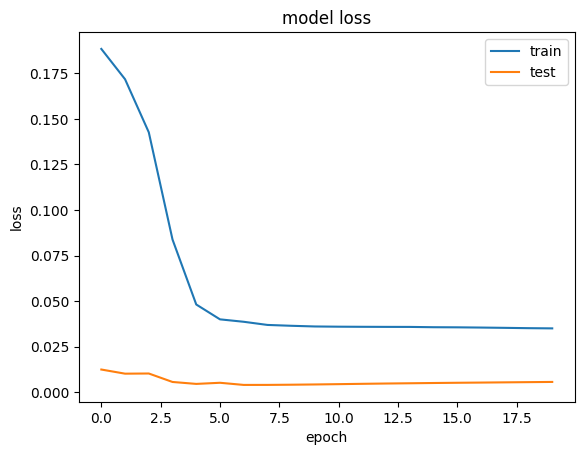

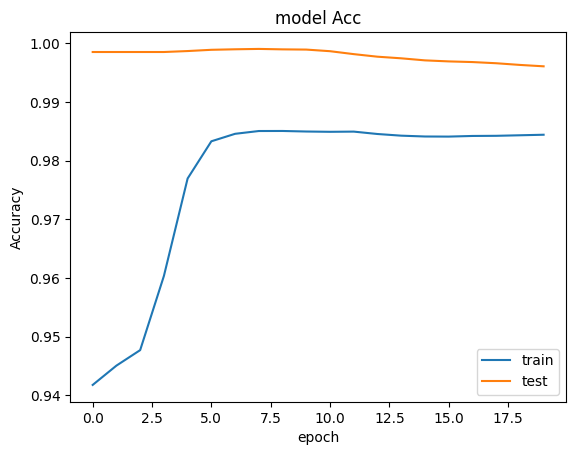

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


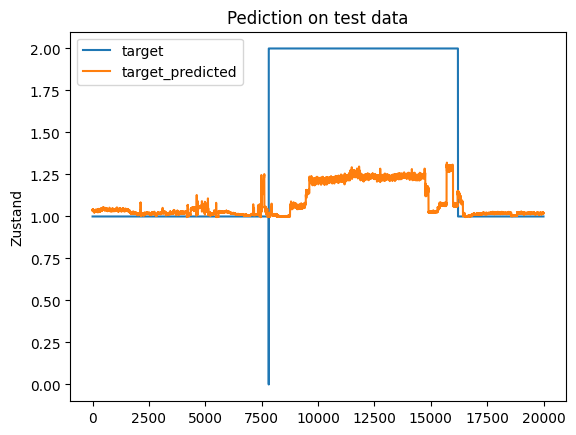

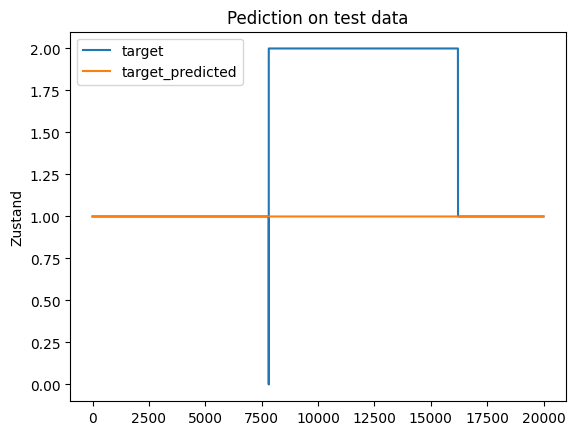

In [ ]:


# %%
# TRAIN THE MODEL...
    Train=True
    inputshape_X=(train_X.shape)
    #print(inputshape_X)

    if Train==True:
        #model=model_setup_seq(inputshape_X)
        #history = model.fit(train_X, train_Y, epochs=80, batch_size=32, validation_data=(val_X, val_Y), shuffle=False)

        model=model_setup_Fapi(inputshape_X)
        history = model.fit(train_X, [train_Y, train_Y_Hot], epochs=20, batch_size=32, validation_data=(val_X, [val_Y,val_Y_Hot]), shuffle=False)
        plot_training([history.history['class_out_loss'],history.history['val_class_out_loss']],
                      what='loss',
                      saving=True,
                      name=('training_'+ str(Future)))
        plot_training([history.history['class_out_acc'],history.history['val_class_out_acc']],
                      what='acc',
                      saving=True,
                      name=('training_'+ str(Future)))
        model.save('./model/Pump_LSTM_Fapi_4_new'+ str(Future) + '.h5')

# ...OR LOAD THE MODELl
    else:
        model=tf.keras.models.load_model('./model/Pump_LSTM_Fapi')

# %%
# INFERENCE
    # make a prediction
    [yhat,yclass] = model.predict(test_X)
    Yclass=[np.argmax(yclass[i],0) for i in range(len(yclass))] # get final class

    plot_signal_hat(yhat,test_Y,saving=True, name='Prediction_Signal_fapi3_42_'+ str(Future))
    plot_signal_hat(Yclass,test_Y,saving=True, name='Prediction_class_fapi3_42_'+ str(Future))


# %%
    ##You neede this part only if you want to predict another signal instead of a target. e.g. predict Sensor_42 data.
    #It rescales the signal back to the orignial amplitudes, as it was transformed to 0-1 before.
    # I leave it in for your convenience.

    # test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    # # invert scaling for forecast

    # inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
    # inv_yhat = scaler.inverse_transform(inv_yhat)
    # inv_yhat = inv_yhat[:,0]
    # # invert scaling for actual
    # test_Y = test_Y.reshape((len(test_Y), 1))
    # inv_y = np.concatenate((test_Y, test_X[:, 1:]), axis=1)
    # inv_y = scaler.inverse_transform(inv_y)
    # inv_y = inv_y[:,0]
    # # calculate RMSE
    # rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
    # print('Test RMSE: %.3f' % rmse)

    #plot_results(inv_y,inv_yhat,saving=True)
    # ensure all data is float
#values = values.astype('float32')
 #one-hot-encoding

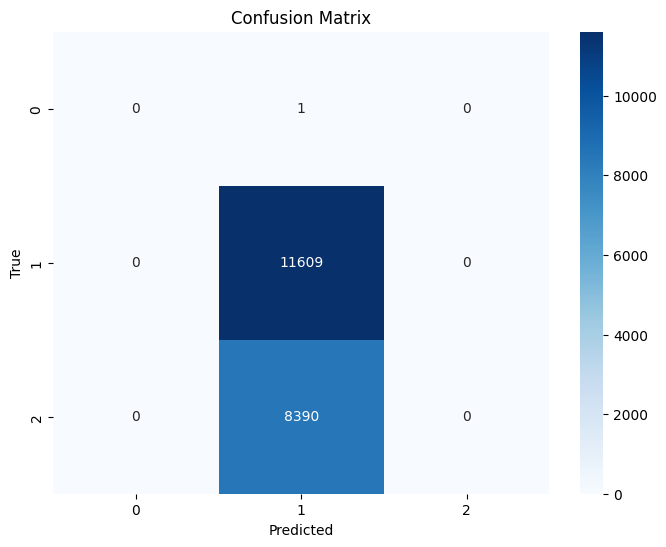

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Yclass contains the predicted classes and test_Y contains the true classes
cm = confusion_matrix(test_Y, Yclass)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 1, 15)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_and_position_embedding_3       │ (None, 1, 32)               │             544 │
│ (TokenAndPositionEmbedding)          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_3                  │ (None, 1, 32)               │          10,656 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_4           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,299 (44.14 KB)

 Trainable params: 11,299 (44.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - accuracy: 0.9647 - loss: 0.0208 - val_accuracy: 0.9944 - val_loss: 0.0011
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.9749 - loss: 0.0158 - val_accuracy: 0.9985 - val_loss: 0.0053
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.9733 - loss: 0.0073 - val_accuracy: 0.9984 - val_loss: 0.0044
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9789 - loss: 0.0163 - val_accuracy: 0.9925 - val_loss: 0.0013
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9642 - loss: 0.0238 - val_accuracy: 0.9929 - val_loss: 0.0012
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.9650 - loss: 0.0309 - val_accuracy: 0.9929 - val_loss: 0.0012
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.9867 - loss: 0.0096 - val_accuracy: 0.9952 - val_loss: 0.0014
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 46s 7ms/step - accuracy: 0.9820 - loss: 0

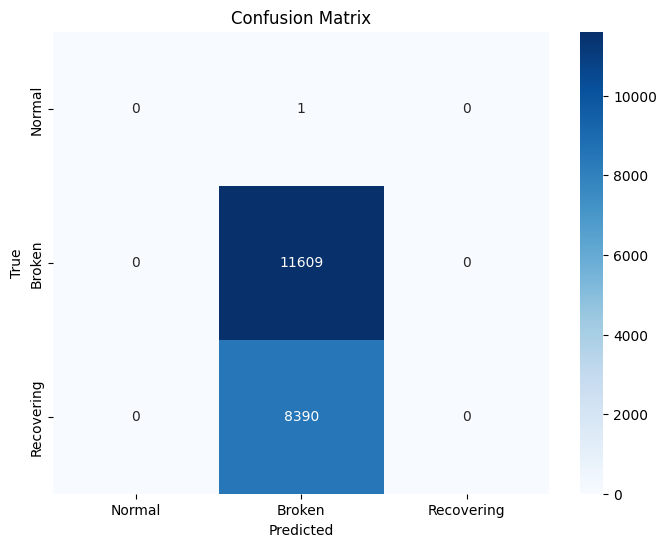

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim)]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)
        self.token_emb = layers.Dense(embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions


def build_transformer_model(input_shape, maxlen, embed_dim, num_heads, ff_dim, num_classes):
    inputs = layers.Input(shape=input_shape)
    embedding_layer = TokenAndPositionEmbedding(maxlen, embed_dim)
    x = embedding_layer(inputs)
    transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
    x = transformer_block(x, training=True)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model


# Parameters
maxlen = train_X.shape[1]  # Sequence length
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed-forward network
num_classes = 3  # Number of output classes (Normal, Broken, Recovering)

# Build the model
transformer_model = build_transformer_model(
    input_shape=(maxlen, train_X.shape[2]),
    maxlen=maxlen,
    embed_dim=embed_dim,
    num_heads=num_heads,
    ff_dim=ff_dim,
    num_classes=num_classes,
)
def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fn(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.keras.backend.clip(y_pred, epsilon, 1.0 - epsilon)
        cross_entropy = -y_true * tf.keras.backend.log(y_pred)
        loss = alpha * tf.keras.backend.pow(1.0 - y_pred, gamma) * cross_entropy
        return tf.keras.backend.mean(tf.keras.backend.sum(loss, axis=-1))
    return focal_loss_fn

# Compile the model with Focal Loss
transformer_model.compile(
    optimizer="adam",
    loss=focal_loss(gamma=2.0, alpha=0.25),
    metrics=["accuracy"]
)


# Print the model summary
transformer_model.summary()

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(np.argmax(train_Y_Hot, axis=1)),
    y=np.argmax(train_Y_Hot, axis=1)
)
class_weights = dict(enumerate(class_weights))


# Train the model
history = transformer_model.fit(
    train_X, train_Y_Hot, epochs=10, batch_size=32, validation_data=(val_X, val_Y_Hot), class_weight=class_weights
)

# Evaluate the model
test_loss, test_acc = transformer_model.evaluate(test_X, test_Y_Hot)
print(f"Test Accuracy: {test_acc:.4f}")


from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_pred_probs = transformer_model.predict(test_X)

# Find the best threshold for the minority class
precision, recall, thresholds = precision_recall_curve(
    test_Y_Hot[:, 2], y_pred_probs[:, 2]  # Replace right with the minority class index
)

# Choose the threshold that maximizes recall
best_threshold = thresholds[np.argmax(recall)]

# Apply the threshold to predictions
y_pred_classes = (y_pred_probs[:, 1] >= best_threshold).astype(int)


# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(np.argmax(test_Y_Hot, axis=1), y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Broken', 'Recovering'], yticklabels=['Normal', 'Broken', 'Recovering'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

(The labels for broken and normal are changed here: Correct labels are 0 - Broken, 1 - Normal, 2 - Recovering)

In [ ]:
model.save('./model/Pump_LSTM_Fapi_4_'+ str(Future) + '.h5')

In [ ]:
if __name__ == '__main__':

#LOAD DATA
    data,sensorname=read_data('pump_sensor.csv')

#MAP TARGETS TO VALUE
    encoded_y=Vorverarbeitung_Y(data['machine_status'])
    Values=pd.concat([data[sensorname],encoded_y],axis=1)#.reindex(data.index)

#PREPROCESS DATA

    Values=manipulate_X(Values, printplot=False); sensorname=Values.keys()[:-1]
    '''
    # Apply PCA to reduce the number of features to 15
    pca = PCA(n_components=15)
    Values_pca = pca.fit_transform(Values[sensorname])

    # Convert the PCA-transformed data back to a DataFrame
    Values_pca = pd.DataFrame(Values_pca, columns=[f'PC{i+1}' for i in range(15)])

    # Add the target column back to the PCA-transformed data
    Values_pca['target'] = Values['target'].values
    '''
   # CREATE WINDOWED DATA
    Future = 1

    data_win = series_to_supervised(Values, n_in=Future, n_out=1)

    # Dynamically generate to_remove_list based on actual column names
    to_remove_list = [col for col in data_win.columns if col.endswith('(t)')]  # Remove all non-shifted elements

    data_y = data_win.iloc[:, -1]  # Get the target data out before removing unwanted data
    data_x = data_win.drop(to_remove_list, axis=1)  # Remove sensors(t)
    data_x.drop(data_x.columns[len(data_x.columns) - 1], axis=1, inplace=True)  # Remove target(t-n)

# %%
#CREATE TRAIN/VAL/TEST SETS
    # We split the data that all sets have at least one error in. But shuffeling is not allowed. Therfore, we do it manually

    train_X,train_Y,val_X,val_Y,test_X,test_Y=splitting_and_shape_data(data_x,data_y)
    train_Y_Hot,val_Y_Hot,test_Y_Hot=one_hot(train_Y,val_Y,test_Y)

#SCALE THE SETS BETWEEN 0-1
    scaler=MinMaxScaler().fit(train_X)
    train_X=scaler.transform(train_X)

    scaler=MinMaxScaler().fit(val_X)
    val_X=scaler.transform(val_X)

    scaler=MinMaxScaler().fit(test_X)
    test_X=scaler.transform(test_X)

#RESHAPE THE DATA TO FIT LSTMs samples, timesteps, sensors  FORMAT
    train_X=reshape_for_Lstm(train_X)
    val_X=reshape_for_Lstm(val_X)
    test_X=reshape_for_Lstm(test_X)

{'BROKEN': 0, 'NORMAL': 1, 'RECOVERING': 2}


<ipython-input-1-3f22a4e047ac>:40: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['sensor_51'][110000:140000]=data['sensor_50'][110000:140000] # repair sensor 51
<ipython-input-1-3f22a4e047ac>:40: SettingWithCopyWarning: 
A value is tryi

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1, 45)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_and_position_embedding         │ (None, 1, 32)               │           1,504 │
│ (TokenAndPositionEmbedding)          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block (TransformerBlock) │ (None, 1, 32)               │          10,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,259 (47.89 KB)

 Trainable params: 12,259 (47.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.9880 - loss: 0.0318 - val_accuracy: 0.9980 - val_loss: 0.0056
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.9965 - loss: 0.0089 - val_accuracy: 0.9993 - val_loss: 0.0026
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.9978 - loss: 0.0059 - val_accuracy: 0.9993 - val_loss: 0.0027
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 48s 9ms/step - accuracy: 0.9981 - loss: 0.0053 - val_accuracy: 0.9979 - val_loss: 0.0083
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 47s 11ms/step - accuracy: 0.9983 - loss: 0.0048 - val_accuracy: 0.9992 - val_loss: 0.0035
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.9985 - loss: 0.0042 - val_accuracy: 0.9992 - val_loss: 0.0029
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.9985 - loss: 0.0045 - val_accuracy: 0.9992 - val_loss: 0.0038
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.9987 - loss: 

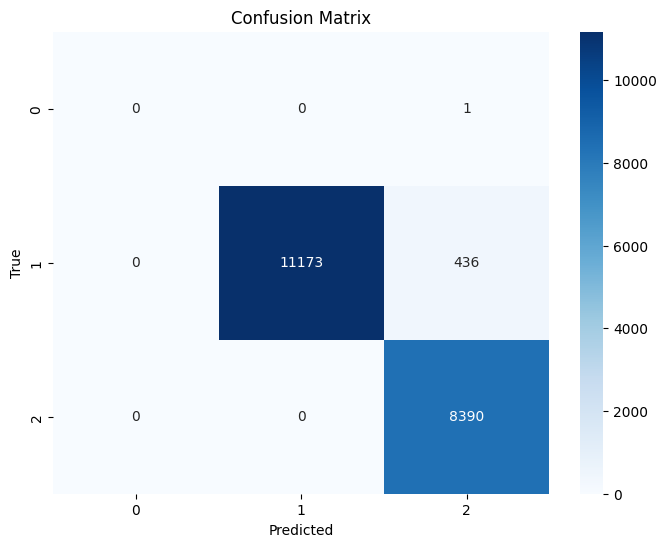

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim)]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)
        self.token_emb = layers.Dense(embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions


def build_transformer_model(input_shape, maxlen, embed_dim, num_heads, ff_dim, num_classes):
    inputs = layers.Input(shape=input_shape)
    embedding_layer = TokenAndPositionEmbedding(maxlen, embed_dim)
    x = embedding_layer(inputs)
    transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
    x = transformer_block(x, training =True)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model


# Parameters
maxlen = train_X.shape[1]  # Sequence length
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed-forward network
num_classes = 3  # Number of output classes (Normal, Broken, Recovering)

# Build the model
transformer_model = build_transformer_model(
    input_shape=(maxlen, train_X.shape[2]),
    maxlen=maxlen,
    embed_dim=embed_dim,
    num_heads=num_heads,
    ff_dim=ff_dim,
    num_classes=num_classes,
)

# Compile the model
transformer_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

# Print the model summary
transformer_model.summary()

# Train the model
history = transformer_model.fit(
    train_X, train_Y_Hot, epochs=20, batch_size=32, validation_data=(val_X, val_Y_Hot)
)

# Evaluate the model
test_loss, test_acc = transformer_model.evaluate(test_X, test_Y_Hot)
print(f"Test Accuracy: {test_acc:.4f}")

# Make predictions
y_pred = transformer_model.predict(test_X)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(np.argmax(test_Y_Hot, axis=1), y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Hyperparameter

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.5 MB/s eta 0:00:00


Trial 10 Complete [00h 05m 57s]
val_recall_label_2: 0.0007881305064074695

Best val_recall_label_2 So Far: 0.0013448258978314698
Total elapsed time: 01h 01m 58s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 44 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0017 - recall_label_2: 0.2235
Test Recall for Label 2: 0.4195
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


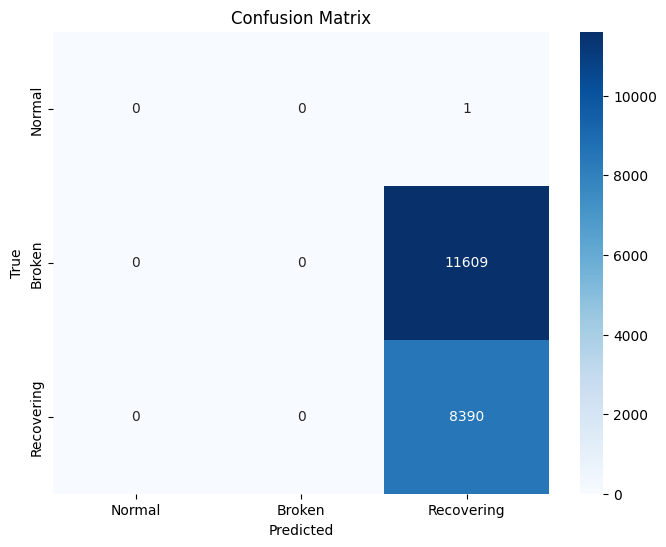

In [ ]:
import tensorflow as tf
import keras_tuner
from tensorflow.keras import layers
from keras_tuner import RandomSearch
import numpy as np
from sklearn.metrics import recall_score, precision_recall_curve

# Custom metric to maximize recall for label 2
def recall_label_2(y_true, y_pred):
    y_true_class = tf.argmax(y_true, axis=1)  # Convert one-hot to class indices
    y_pred_class = tf.argmax(y_pred, axis=1)  # Convert probabilities to class indices
    recall = tf.reduce_mean(tf.cast(tf.equal(y_true_class, 2) & tf.equal(y_pred_class, 2), tf.float32))
    return recall

# Focal Loss
def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fn(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.keras.backend.clip(y_pred, epsilon, 1.0 - epsilon)
        cross_entropy = -y_true * tf.keras.backend.log(y_pred)
        loss = alpha * tf.keras.backend.pow(1.0 - y_pred, gamma) * cross_entropy
        return tf.keras.backend.mean(tf.keras.backend.sum(loss, axis=-1))
    return focal_loss_fn

# Define the model-building function for Keras Tuner
def build_model(hp):
    embed_dim = hp.Int('embed_dim', min_value=16, max_value=64, step=16)
    num_heads = hp.Int('num_heads', min_value=1, max_value=4, step=1)
    ff_dim = hp.Int('ff_dim', min_value=16, max_value=64, step=16)
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    gamma = hp.Float('gamma', min_value=1.0, max_value=3.0, step=0.5)  # Focal Loss gamma
    alpha = hp.Float('alpha', min_value=0.1, max_value=0.9, step=0.2)  # Focal Loss alpha

    inputs = layers.Input(shape=(maxlen, train_X.shape[2]))
    embedding_layer = TokenAndPositionEmbedding(maxlen, embed_dim)
    x = embedding_layer(inputs)
    transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim, dropout_rate)
    x = transformer_block(x,training=True)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(3, activation="softmax")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compile with Focal Loss
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss=focal_loss(gamma=gamma, alpha=alpha),
        metrics=[recall_label_2],
    )
    return model

# Compute class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(np.argmax(train_Y_Hot, axis=1)),
    y=np.argmax(train_Y_Hot, axis=1)
)
class_weights = dict(enumerate(class_weights))

# Initialize Keras Tuner
tuner = RandomSearch(
    build_model,
    objective=keras_tuner.Objective("val_recall_label_2", direction="max"),
    max_trials=10,
    executions_per_trial=2,
    directory='tuner_results',
    project_name='transformer_tuning_recall_label_2'
)

# Perform hyperparameter search with class weights
tuner.search(
    train_X, train_Y_Hot,
    epochs=5,
    batch_size=32,
    validation_data=(val_X, val_Y_Hot),
    class_weight=class_weights,
)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test set
test_loss, test_recall_label_2 = best_model.evaluate(test_X, test_Y_Hot)
print(f"Test Recall for Label 2: {test_recall_label_2:.4f}")

# Make predictions
y_pred_probs = best_model.predict(test_X)

# Threshold Tuning for Label 2
precision, recall, thresholds = precision_recall_curve(
    test_Y_Hot[:, 2], y_pred_probs[:, 2]  # Focus on label 2
)

# Find the threshold that maximizes recall for label 2
best_threshold = thresholds[np.argmax(recall)]

# Apply the threshold to predictions
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_pred_classes[y_pred_probs[:, 2] >= best_threshold] = 2  # Override predictions for label 2

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(np.argmax(test_Y_Hot, axis=1), y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Broken', 'Recovering'], yticklabels=['Normal', 'Broken', 'Recovering'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


(The labels for broken and normal are changed here: Correct labels are 0 - Broken, 1 - Normal, 2 - Recovering)

Original

In [ ]:
model = tf.keras.models.load_model('Pump_LSTM_Fapi_4_1.h5')

<>:26: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:26: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<ipython-input-10-2f231245d536>:26: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  namen +=[('sensor%d(t+%d)' '%'(j+1, i)) for j in range (n_vars)]


{'BROKEN': 0, 'NORMAL': 1, 'RECOVERING': 2}


<ipython-input-3-3f22a4e047ac>:40: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['sensor_51'][110000:140000]=data['sensor_50'][110000:140000] # repair sensor 51
<ipython-input-3-3f22a4e047ac>:40: SettingWithCopyWarning: 
A value is tryi

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


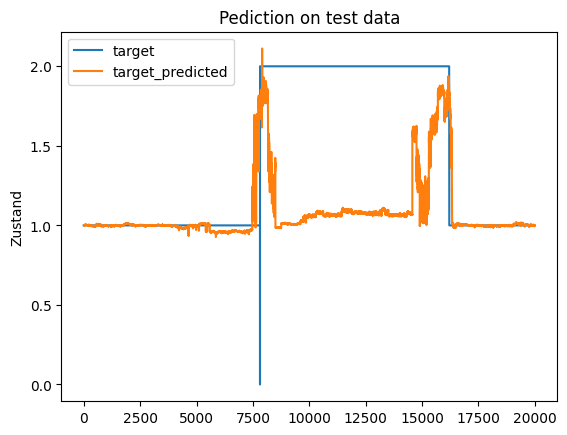

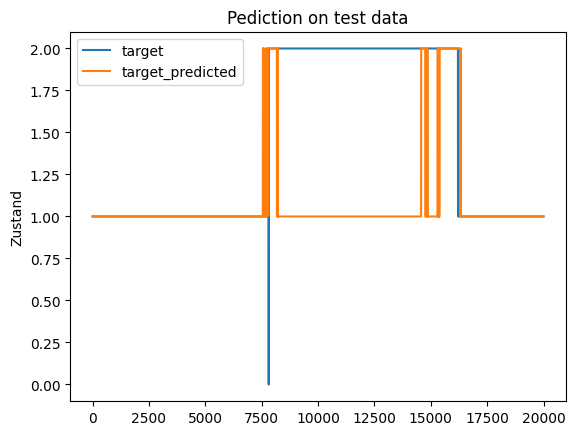

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from math import sqrt
#from Sensor_analysis import read_data, manipulate_X, Vorverarbeitung_Y
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf


def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, namen = list(),list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        namen +=[('sensor%d(t-%d)' %(j+1, i)) for j in range (n_vars)]
        #forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            namen +=[('sensor%d(t)' %(j+1)) for j in range (n_vars)]
        else:
            namen +=[('sensor%d(t+%d)' '%'(j+1, i)) for j in range (n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns=namen
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

def splitting_and_shape_data(data_x,data_y):
    train_X=data_x[0:120000].values
    train_Y=data_y[0:120000].values

    val_X=data_x[140000::].values
    val_Y=data_y[140000::].values

    test_X=data_x[120000:140000].values
    test_Y=data_y[120000:140000].values

    train_X.astype('float32')
    val_X.astype('float32')
    test_X.astype('float32')

    return train_X,train_Y,val_X,val_Y,test_X,test_Y,

def reshape_for_Lstm(data):
    # reshape for input
    timesteps=1
    samples=int(np.floor(data.shape[0]/timesteps))

    data=data.reshape((samples,timesteps,data.shape[1]))   #samples, timesteps, sensors
    return data

    #one hot encode the targets for class prediction/ not for signal prediction
def one_hot(train_Y,val_Y,test_Y):
    from sklearn.preprocessing import OneHotEncoder

    oneHot=OneHotEncoder()
    oneHot.fit(train_Y.reshape(-1,1))

    train_Y_Hot=oneHot.transform(train_Y.reshape(-1,1)).toarray()
    val_Y_Hot  =oneHot.transform(val_Y.reshape(-1,1)).toarray()
    test_Y_Hot =oneHot.transform(test_Y.reshape(-1,1)).toarray()

    return train_Y_Hot,val_Y_Hot,test_Y_Hot


def model_setup_seq(in_shape):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM
    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.layers import Dense

    model = Sequential()
    model.add(LSTM(32,activation='relu', input_shape=(in_shape[1],in_shape[2]),
                   return_sequences=True)  )#,
                   # kernel_regularizer=tf.keras.regularizers.L1L2(0.01,0.01)))
    #model.add(Dropout(0.3))
    model.add(LSTM(32,activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def model_setup_Fapi(in_shape):
    from tensorflow.keras.layers import LSTM
    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.layers import Dense

    inputs= tf.keras.Input(shape=(in_shape[1],in_shape[2]))
    x=LSTM(42,activation='relu', input_shape=(in_shape[1],in_shape[2]),return_sequences=True)(inputs)
    x=LSTM(42,activation='relu')(x)
    out_signal=Dense(1, name='signal_out')(x)
    out_class=Dense(3,activation='softmax', name='class_out')(x)

    model=tf.keras.Model(inputs=inputs, outputs=[out_signal,out_class])

    model.compile(loss={'signal_out':'mean_squared_error',
                        'class_out' :'categorical_crossentropy'},
                         optimizer='adam',
                         metrics={'class_out':'acc'})

    print(model.summary())
    return model

def plot_training(history,what='loss',saving=False,name='training'):
    fig=plt.figure()
    plt.plot(history[0])
    plt.plot(history[1])
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    if what=='loss':
        plt.title('model loss')
        plt.ylabel('loss')
    elif what=='acc':
        plt.title('model Acc')
        plt.ylabel('Accuracy')
    if saving==True:
        fig.savefig( name +'_'+ what + '.png', format='png', dpi=300, transparent=True)


    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    if saving==True:
        fig.savefig( name +'_ACC.png', format='png', dpi=300, transparent=True)
    plt.show()

def plot_signal_hat(Y_test,Y_hat,saving=False,name='results_signal'):
    fig= plt.figure()
    plt.plot(Y_hat)
    plt.plot(Y_test)
    plt.legend(['target','target_predicted'])
    plt.ylabel('Zustand')
    plt.title('Pediction on test data')
    if saving==True:
        fig.savefig( name +'.png', format='png', dpi=300, transparent=True)
    plt.show()

def plot_class_hat(Y_hat,Y_test,saving=False,name='results_class'):
    # HERE WE TRY TO PLOT MULTICOLOR BASED ON PROBABILITY VALUE, BUT IT DOES NOT WOR. IMPUT WELCOME
    import matplotlib.pyplot as plt
    from matplotlib import cm
    import numpy as np
    x=np.linspace(1,len(Y_hat),len(Y_hat))

    fig=plt.figure()
    ax1=fig.add_subplot(111)
    ax1=plt.plot(x,Y_test)
    ax1=plt.scatter(x,Y_hat,c=cm.hot(np.abs(Y_hat)), edgecolor='none') # multicolour print
    plt.legend(['target','target_predicted'])
    if saving==True:
        fig.savefig( name +'.png', format='png', dpi=300, transparent=True)
    plt.show()

#%%
if __name__ == '__main__':

#LOAD DATA
    data,sensorname=read_data('pump_sensor.csv')

#MAP TARGETS TO VALUE
    encoded_y=Vorverarbeitung_Y(data['machine_status'])
    Values=pd.concat([data[sensorname],encoded_y],axis=1)#.reindex(data.index)

#PREPROCESS DATA
    Values=manipulate_X(Values, printplot=False); sensorname=Values.keys()[:-1]

#CREATE WINDOWED DATA
    Future=1

    data_win=series_to_supervised(Values, n_in=Future, n_out=1)
    to_remove_list =['sensor'+str(n)+'(t)' for n in range(1,len(Values.columns)+1)] #now remove all non shifted elements again. so we retreive elements and shifted target
    #to_remove_list_2 =['sensor'+str(n)+'(t-'+ str(i)+')' for n in range(1,len(data_scaled.columns)+1) for i in range(1,Future)] #now remove all non shifted elements again. so we retreive elements and shifted target
    #to_remove_list=to_remove_list_1+to_remove_list_2
    data_y=data_win.iloc[:,-1] #Get the target data out before removing unwanted data
    data_x=data_win.drop(to_remove_list, axis=1) #remove sensors(t)
    data_x.drop(data_x.columns[len(data_x.columns)-1], axis=1, inplace=True)# remove target(t-n)

# %%
#CREATE TRAIN/VAL/TEST SETS
    # We split the data that all sets have at least one error in. But shuffeling is not allowed. Therfore, we do it manually

    train_X,train_Y,val_X,val_Y,test_X,test_Y=splitting_and_shape_data(data_x,data_y)
    train_Y_Hot,val_Y_Hot,test_Y_Hot=one_hot(train_Y,val_Y,test_Y)

#SCALE THE SETS BETWEEN 0-1
    scaler=MinMaxScaler().fit(train_X)
    train_X=scaler.transform(train_X)

    scaler=MinMaxScaler().fit(val_X)
    val_X=scaler.transform(val_X)

    scaler=MinMaxScaler().fit(test_X)
    test_X=scaler.transform(test_X)

#RESHAPE THE DATA TO FIT LSTMs samples, timesteps, sensors  FORMAT
    train_X=reshape_for_Lstm(train_X)
    val_X=reshape_for_Lstm(val_X)
    test_X=reshape_for_Lstm(test_X)
'''
# %%
# TRAIN THE MODEL...
    Train=True
    inputshape_X=(train_X.shape)
    #print(inputshape_X)

    if Train==True:
        #model=model_setup_seq(inputshape_X)
        #history = model.fit(train_X, train_Y, epochs=80, batch_size=32, validation_data=(val_X, val_Y), shuffle=False)

        model=model_setup_Fapi(inputshape_X)
        history = model.fit(train_X, [train_Y, train_Y_Hot], epochs=20, batch_size=32, validation_data=(val_X, [val_Y,val_Y_Hot]), shuffle=False)
        plot_training([history.history['class_out_loss'],history.history['val_class_out_loss']],
                      what='loss',
                      saving=True,
                      name=('training_'+ str(Future)))
        plot_training([history.history['class_out_acc'],history.history['val_class_out_acc']],
                      what='acc',
                      saving=True,
                      name=('training_'+ str(Future)))
        model.save('./model/Pump_LSTM_Fapi_4_'+ str(Future) + '.h5')

# ...OR LOAD THE MODELl
    else:
        model=tf.keras.models.load_model('./model/Pump_LSTM_Fapi')
'''
# %%
# INFERENCE
# make a prediction
[yhat,yclass] = model.predict(test_X)
Yclass=[np.argmax(yclass[i],0) for i in range(len(yclass))] # get final class

plot_signal_hat(yhat,test_Y,saving=True, name='Prediction_Signal_fapi3_42_'+ str(Future))
plot_signal_hat(Yclass,test_Y,saving=True, name='Prediction_class_fapi3_42_'+ str(Future))


# %%
    ##You neede this part only if you want to predict another signal instead of a target. e.g. predict Sensor_42 data.
    #It rescales the signal back to the orignial amplitudes, as it was transformed to 0-1 before.
    # I leave it in for your convenience.

    # test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    # # invert scaling for forecast

    # inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
    # inv_yhat = scaler.inverse_transform(inv_yhat)
    # inv_yhat = inv_yhat[:,0]
    # # invert scaling for actual
    # test_Y = test_Y.reshape((len(test_Y), 1))
    # inv_y = np.concatenate((test_Y, test_X[:, 1:]), axis=1)
    # inv_y = scaler.inverse_transform(inv_y)
    # inv_y = inv_y[:,0]
    # # calculate RMSE
    # rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
    # print('Test RMSE: %.3f' % rmse)

    #plot_results(inv_y,inv_yhat,saving=True)
    # ensure all data is float
#values = values.astype('float32')
 #one-hot-encoding

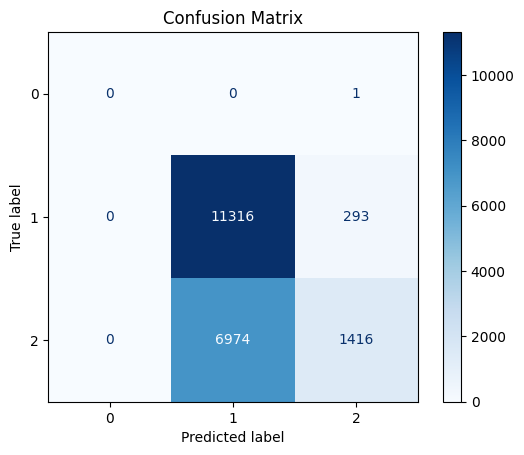

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_Y, Yclass)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()